**Dataset:** The dataset contains for now a comprehensive view of the electricity generation profile for Estonia, Finland, Germany, Italy, Norway and Singapore on an hourly basis, including details on carbon intensity, low carbon and renewable energy percentages, and the source and estimation status of the data.

Here's an explanation of each variable in the dataset:

**Datetime (UTC):** The date and time in Coordinated Universal Time (UTC) for the recorded data.

**Country:** The name of the country for which the data is recorded (Estonia in this case).

**Zone Name:** The name of the specific electricity zone within the country (Estonia in this case).

**Zone Id:** The identifier for the electricity zone (EE for Estonia).

**Carbon Intensity gCO₂eq/kWh (direct):** The direct carbon intensity of electricity generation, measured in grams of CO₂ equivalent per kilowatt-hour (gCO₂eq/kWh). This measures the amount of direct CO₂ emissions produced per unit of electricity consumed.

**Carbon Intensity gCO₂eq/kWh (LCA):** The life cycle assessment (LCA) carbon intensity of electricity generation, measured in grams of CO₂ equivalent per kilowatt-hour (gCO₂eq/kWh). This includes direct emissions as well as upstream emissions from the production of fuels and materials.

**Low Carbon Percentage:** The percentage of electricity generated from low carbon sources (e.g., nuclear, hydro, and other renewable sources).

**Renewable Percentage:** The percentage of electricity generated from renewable sources (e.g., wind, solar, hydro).

**Data Source:** The source from which the data was obtained (e.g., entsoe.eu).

**Data Estimated:** A boolean indicating whether the data was estimated (True) or not (False).

**Data Estimation Method:** The method used to estimate the data, if applicable.

In [2]:
#connecting Google Drive with Colab
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [1]:
# Ensure you have installed the necessary libraries
!pip install timesfm

In [3]:
import pandas as pd
import timesfm
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from google.colab import drive

In [4]:
import pandas as pd
from google.colab import drive

# Mount Google Drive to access your data
drive.mount('/content/drive')

# List of countries and their respective file paths
countries = {
    'Estonia': ['/content/drive/My Drive/thesis/data/estonia/EE_2021_hourly.csv',
                '/content/drive/My Drive/thesis/data/estonia/EE_2022_hourly.csv',
                '/content/drive/My Drive/thesis/data/estonia/EE_2023_hourly.csv'],
    'Finland': ['/content/drive/My Drive/thesis/data/finland/FI_2021_hourly.csv',
                '/content/drive/My Drive/thesis/data/finland/FI_2022_hourly.csv',
                '/content/drive/My Drive/thesis/data/finland/FI_2023_hourly.csv'],
    'Germany': ['/content/drive/My Drive/thesis/data/germany/DE_2021_hourly.csv',
                '/content/drive/My Drive/thesis/data/germany/DE_2022_hourly.csv',
                '/content/drive/My Drive/thesis/data/germany/DE_2023_hourly.csv'],
    'Italy': ['/content/drive/My Drive/thesis/data/italy/IT_2021_hourly.csv',
              '/content/drive/My Drive/thesis/data/italy/IT_2022_hourly.csv',
              '/content/drive/My Drive/thesis/data/italy/IT_2023_hourly.csv'],
    'Norway': ['/content/drive/My Drive/thesis/data/norway/NO_2021_hourly.csv',
               '/content/drive/My Drive/thesis/data/norway/NO_2022_hourly.csv',
               '/content/drive/My Drive/thesis/data/norway/NO_2023_hourly.csv'],
    'Singapore': ['/content/drive/My Drive/thesis/data/singapore/SG_2021_hourly.csv',
                  '/content/drive/My Drive/thesis/data/singapore/SG_2022_hourly.csv',
                  '/content/drive/My Drive/thesis/data/singapore/SG_2023_hourly.csv'],
}

# Function to load data from a list of CSV files
def load_data(file_paths):
    data_frames = [pd.read_csv(file_path, parse_dates=['Datetime (UTC)'], index_col='Datetime (UTC)') for file_path in file_paths]
    data = pd.concat(data_frames)
    return data

# Load data for each country
data = {country: load_data(file_paths) for country, file_paths in countries.items()}

# Display the first few rows of the data for Estonia
print("First few rows of Estonia data:")
print(data['Estonia'].head())


Mounted at /content/drive
First few rows of Estonia data:
                     Country Zone Name Zone Id  \
Datetime (UTC)                                   
2021-01-01 00:00:00  Estonia   Estonia      EE   
2021-01-01 01:00:00  Estonia   Estonia      EE   
2021-01-01 02:00:00  Estonia   Estonia      EE   
2021-01-01 03:00:00  Estonia   Estonia      EE   
2021-01-01 04:00:00  Estonia   Estonia      EE   

                     Carbon Intensity gCO₂eq/kWh (direct)  \
Datetime (UTC)                                              
2021-01-01 00:00:00                                245.88   
2021-01-01 01:00:00                                252.83   
2021-01-01 02:00:00                                257.13   
2021-01-01 03:00:00                                256.49   
2021-01-01 04:00:00                                251.51   

                     Carbon Intensity gCO₂eq/kWh (LCA)  Low Carbon Percentage  \
Datetime (UTC)                                                                  
2

In [5]:
# Display the first few rows of the data for Singapore
print("First few rows of Singapore data:")
print(data['Singapore'].head())

First few rows of Singapore data:
                       Country  Zone Name Zone Id  \
Datetime (UTC)                                      
2021-01-01 00:00:00  Singapore  Singapore      SG   
2021-01-01 01:00:00  Singapore  Singapore      SG   
2021-01-01 02:00:00  Singapore  Singapore      SG   
2021-01-01 03:00:00  Singapore  Singapore      SG   
2021-01-01 04:00:00  Singapore  Singapore      SG   

                     Carbon Intensity gCO₂eq/kWh (direct)  \
Datetime (UTC)                                              
2021-01-01 00:00:00                                372.76   
2021-01-01 01:00:00                                370.75   
2021-01-01 02:00:00                                369.13   
2021-01-01 03:00:00                                368.45   
2021-01-01 04:00:00                                367.74   

                     Carbon Intensity gCO₂eq/kWh (LCA)  Low Carbon Percentage  \
Datetime (UTC)                                                                  
2021

In [6]:
#Understand the data
# Check data info, columns, shape, and missing values
for country, df in data.items():
    print(f"\nData info for {country}:")
    df.info()

    print(f"\nColumns in {country} data:")
    print(df.columns)

    print(f"\nShape of {country} data:")
    print(df.shape)

    print(f"\nMissing values in {country} data:")
    print(df.isnull().sum())

    print(f"\nDescriptive statistics for {country} data:")
    print(df.describe())

# Changing the format of .describe() for better analysis
pd.options.display.float_format = "{:.3f}".format
for country, df in data.items():
    dsc = df.describe()
    dsc.loc['count'] = dsc.loc['count'].astype(int).astype(str)
    dsc.iloc[1:] = dsc.iloc[1:].applymap('{:.4f}'.format)
    print(f"\nFormatted descriptive statistics for {country} data:")
    print(dsc)



Data info for Estonia:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 26280 entries, 2021-01-01 00:00:00 to 2023-12-31 23:00:00
Data columns (total 10 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Country                               26280 non-null  object 
 1   Zone Name                             26280 non-null  object 
 2   Zone Id                               26280 non-null  object 
 3   Carbon Intensity gCO₂eq/kWh (direct)  26280 non-null  float64
 4   Carbon Intensity gCO₂eq/kWh (LCA)     26280 non-null  float64
 5   Low Carbon Percentage                 26280 non-null  float64
 6   Renewable Percentage                  26280 non-null  float64
 7   Data Source                           26280 non-null  object 
 8   Data Estimated                        26280 non-null  bool   
 9   Data Estimation Method                71 non-null     object 
dtypes: bool(1), float64(4),

<ipython-input-6-4b39c4284aca>:23: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '26280' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  dsc.loc['count'] = dsc.loc['count'].astype(int).astype(str)
<ipython-input-6-4b39c4284aca>:24: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  dsc.iloc[1:] = dsc.iloc[1:].applymap('{:.4f}'.format)
<ipython-input-6-4b39c4284aca>:23: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '26280' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  dsc.loc['count'] = dsc.loc['count'].astype(int).astype(str)
<ipython-input-6-4b39c4284aca>:24: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  dsc.iloc[1:] = dsc.iloc[1:].applymap('{:.4f}'.format)
<ipython-input-6-4b39c4284aca>:2

In [7]:
# Function to handle missing values
def handle_missing_values(df):
    # Drop the 'Data Estimation Method' column due to high number of missing values
    df = df.drop(columns=['Data Estimation Method'])

    # Fill missing values in numeric columns with the mean of the respective columns
    numeric_columns = df.select_dtypes(include=[np.number]).columns
    df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].mean())

    return df

# Handle missing values for each country
data = {country: handle_missing_values(df) for country, df in data.items()}

# Check for remaining missing values
for country, df in data.items():
    print(f"\nRemaining missing values in {country} data:")
    print(df.isnull().sum())



Remaining missing values in Estonia data:
Country                                 0
Zone Name                               0
Zone Id                                 0
Carbon Intensity gCO₂eq/kWh (direct)    0
Carbon Intensity gCO₂eq/kWh (LCA)       0
Low Carbon Percentage                   0
Renewable Percentage                    0
Data Source                             0
Data Estimated                          0
dtype: int64

Remaining missing values in Finland data:
Country                                 0
Zone Name                               0
Zone Id                                 0
Carbon Intensity gCO₂eq/kWh (direct)    0
Carbon Intensity gCO₂eq/kWh (LCA)       0
Low Carbon Percentage                   0
Renewable Percentage                    0
Data Source                             0
Data Estimated                          0
dtype: int64

Remaining missing values in Germany data:
Country                                 0
Zone Name                               0
Zone 

In [8]:
# Function to handle remaining missing values
def handle_remaining_missing_values(df):
    # Fill missing values in 'Data Source' with 'Unknown'
    df['Data Source'].fillna('Unknown', inplace=True)

    # Fill missing values in 'Data Estimated' with the mode (most frequent value)
    df['Data Estimated'].fillna(df['Data Estimated'].mode()[0], inplace=True)

    return df

# Handle remaining missing values for each country
data = {country: handle_remaining_missing_values(df) for country, df in data.items()}

# Check for remaining missing values
for country, df in data.items():
    print(f"\nRemaining missing values in {country} data:")
    print(df.isnull().sum())



Remaining missing values in Estonia data:
Country                                 0
Zone Name                               0
Zone Id                                 0
Carbon Intensity gCO₂eq/kWh (direct)    0
Carbon Intensity gCO₂eq/kWh (LCA)       0
Low Carbon Percentage                   0
Renewable Percentage                    0
Data Source                             0
Data Estimated                          0
dtype: int64

Remaining missing values in Finland data:
Country                                 0
Zone Name                               0
Zone Id                                 0
Carbon Intensity gCO₂eq/kWh (direct)    0
Carbon Intensity gCO₂eq/kWh (LCA)       0
Low Carbon Percentage                   0
Renewable Percentage                    0
Data Source                             0
Data Estimated                          0
dtype: int64

Remaining missing values in Germany data:
Country                                 0
Zone Name                               0
Zone 

<ipython-input-8-0970a8a2a457>:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'Unknown' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df['Data Source'].fillna('Unknown', inplace=True)


In [9]:
from sklearn.preprocessing import StandardScaler

# Function to normalize data
def normalize_data(df):
    numeric_columns = df.select_dtypes(include=[np.number]).columns
    scaler = StandardScaler()
    df[numeric_columns] = scaler.fit_transform(df[numeric_columns])
    return df

# Normalize data for each country
normalized_data = {country: normalize_data(df) for country, df in data.items()}

# Display normalized data for one country (e.g., Estonia) as an example
print("\nNormalized data for Estonia:")
print(normalized_data['Estonia'].head())



Normalized data for Estonia:
                     Country Zone Name Zone Id  \
Datetime (UTC)                                   
2021-01-01 00:00:00  Estonia   Estonia      EE   
2021-01-01 01:00:00  Estonia   Estonia      EE   
2021-01-01 02:00:00  Estonia   Estonia      EE   
2021-01-01 03:00:00  Estonia   Estonia      EE   
2021-01-01 04:00:00  Estonia   Estonia      EE   

                     Carbon Intensity gCO₂eq/kWh (direct)  \
Datetime (UTC)                                              
2021-01-01 00:00:00                                -0.363   
2021-01-01 01:00:00                                -0.313   
2021-01-01 02:00:00                                -0.283   
2021-01-01 03:00:00                                -0.288   
2021-01-01 04:00:00                                -0.323   

                     Carbon Intensity gCO₂eq/kWh (LCA)  Low Carbon Percentage  \
Datetime (UTC)                                                                  
2021-01-01 00:00:00          

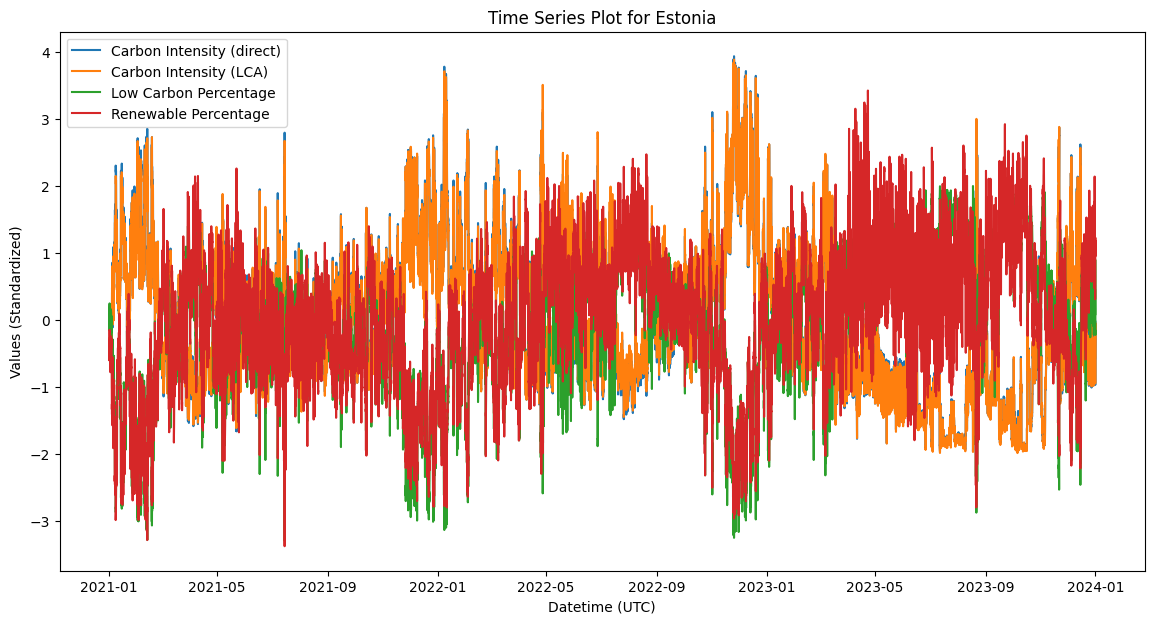

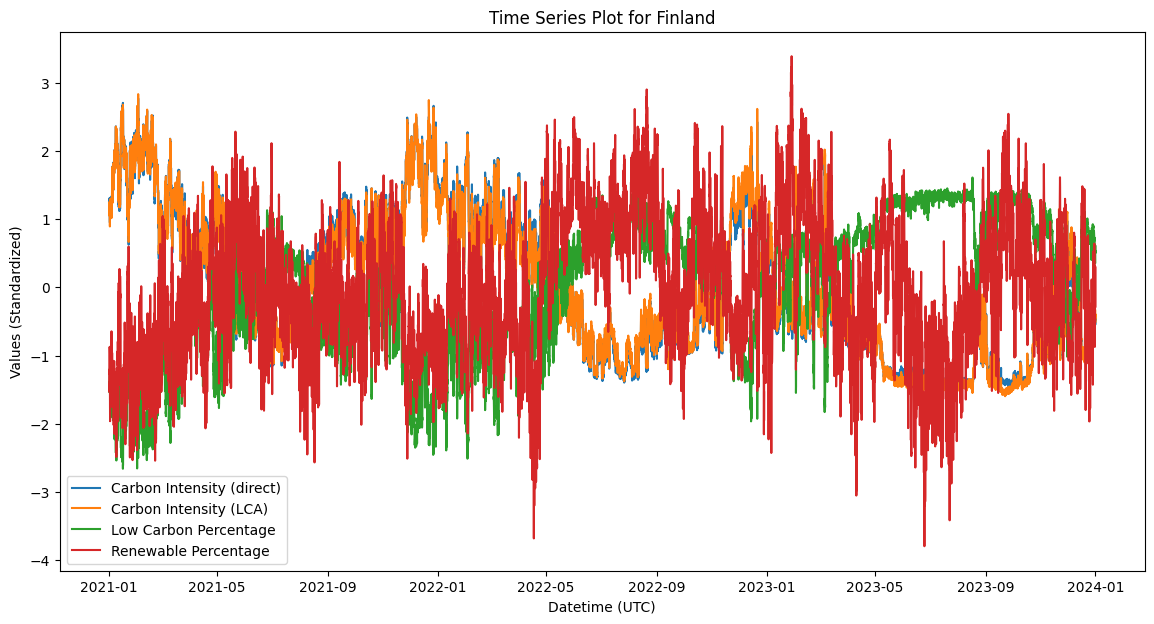

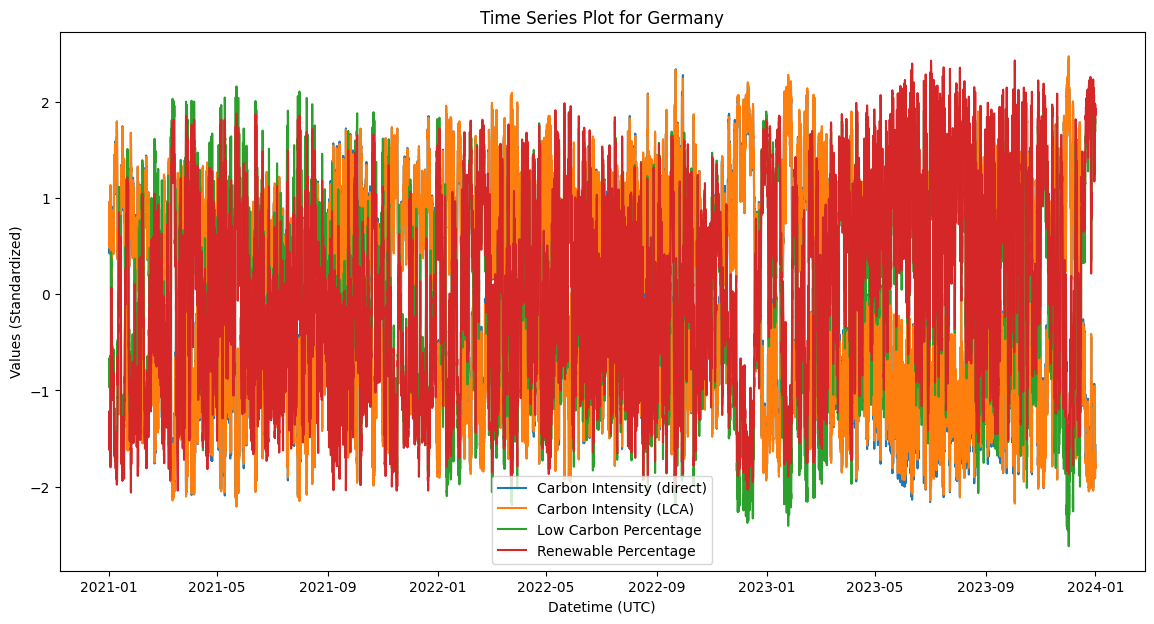

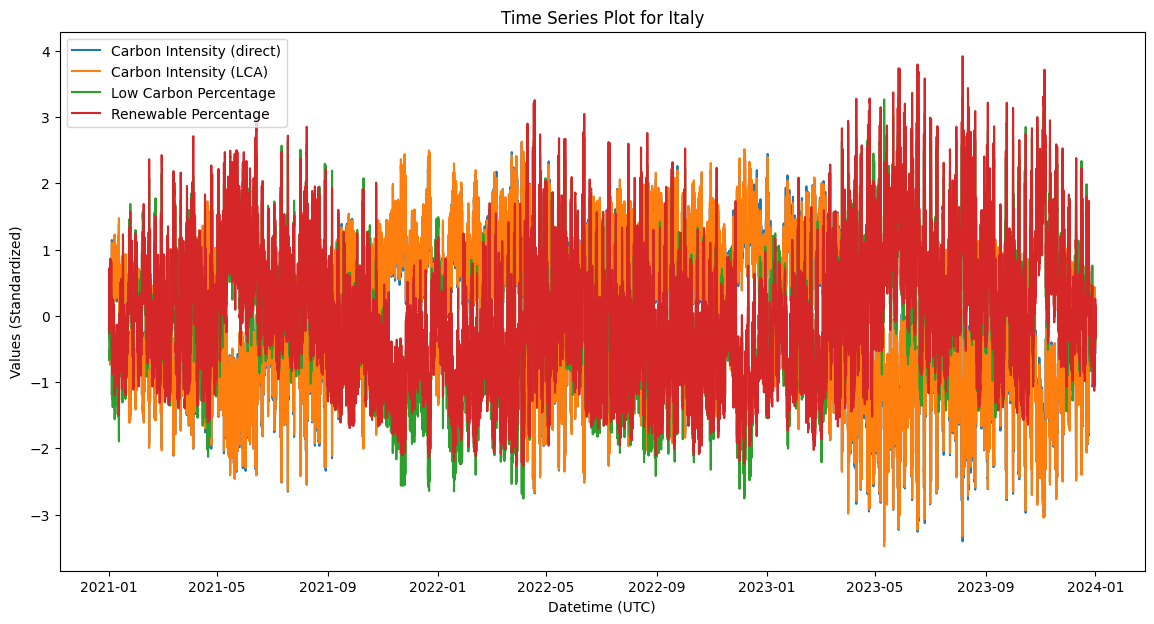

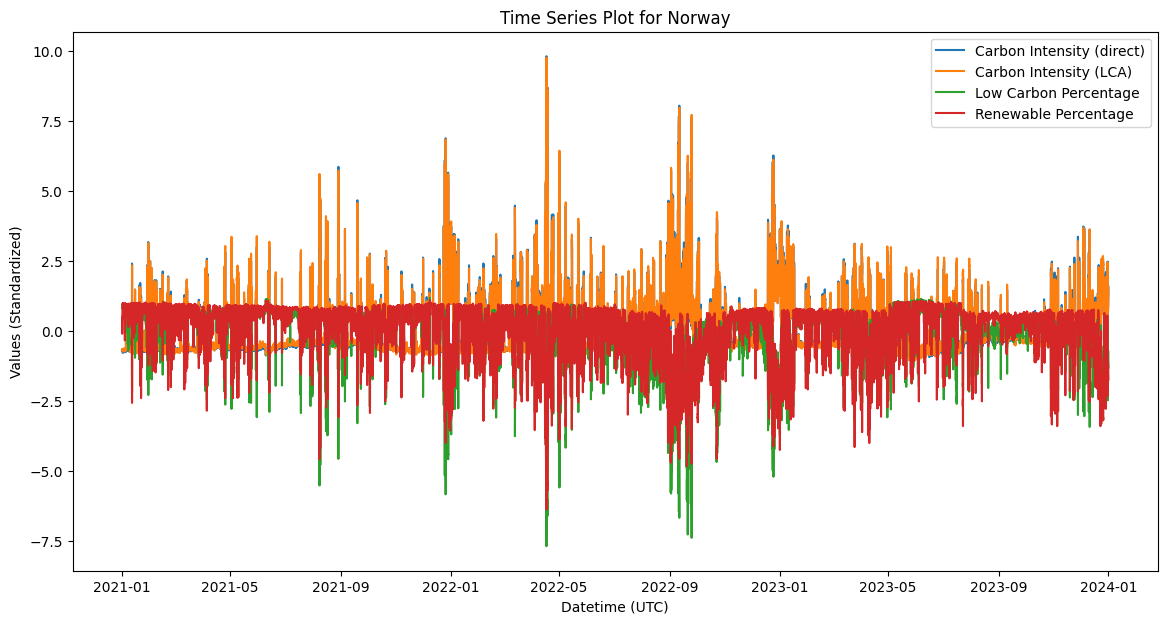

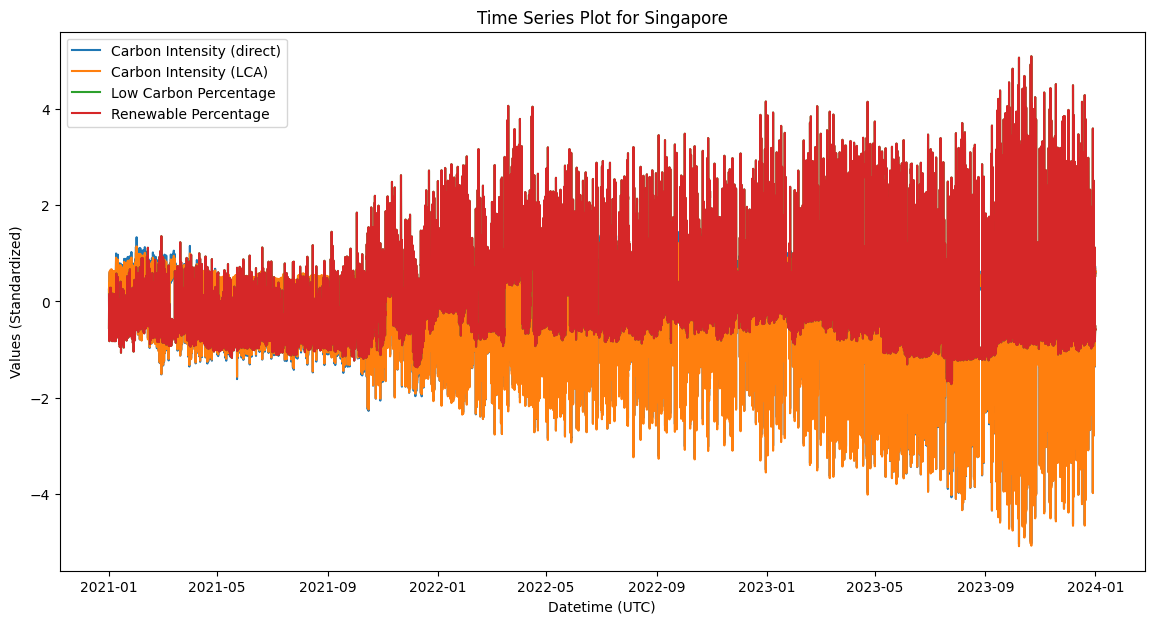

In [10]:
### Exploratory Data Analysis (EDA
import matplotlib.pyplot as plt

# Function to plot time series data
def plot_time_series(data, country):
    plt.figure(figsize=(14, 7))
    plt.plot(data.index, data['Carbon Intensity gCO₂eq/kWh (direct)'], label='Carbon Intensity (direct)')
    plt.plot(data.index, data['Carbon Intensity gCO₂eq/kWh (LCA)'], label='Carbon Intensity (LCA)')
    plt.plot(data.index, data['Low Carbon Percentage'], label='Low Carbon Percentage')
    plt.plot(data.index, data['Renewable Percentage'], label='Renewable Percentage')
    plt.title(f'Time Series Plot for {country}')
    plt.xlabel('Datetime (UTC)')
    plt.ylabel('Values (Standardized)')
    plt.legend()
    plt.show()

# Plot time series data for all countries
for country in normalized_data:
    plot_time_series(normalized_data[country], country)


In [11]:
# Print column names of the loaded data for each country
for country, df in data.items():
    print(f"\nColumns in {country} data:")
    print(df.columns)



Columns in Estonia data:
Index(['Country', 'Zone Name', 'Zone Id',
       'Carbon Intensity gCO₂eq/kWh (direct)',
       'Carbon Intensity gCO₂eq/kWh (LCA)', 'Low Carbon Percentage',
       'Renewable Percentage', 'Data Source', 'Data Estimated'],
      dtype='object')

Columns in Finland data:
Index(['Country', 'Zone Name', 'Zone Id',
       'Carbon Intensity gCO₂eq/kWh (direct)',
       'Carbon Intensity gCO₂eq/kWh (LCA)', 'Low Carbon Percentage',
       'Renewable Percentage', 'Data Source', 'Data Estimated'],
      dtype='object')

Columns in Germany data:
Index(['Country', 'Zone Name', 'Zone Id',
       'Carbon Intensity gCO₂eq/kWh (direct)',
       'Carbon Intensity gCO₂eq/kWh (LCA)', 'Low Carbon Percentage',
       'Renewable Percentage', 'Data Source', 'Data Estimated'],
      dtype='object')

Columns in Italy data:
Index(['Country', 'Zone Name', 'Zone Id',
       'Carbon Intensity gCO₂eq/kWh (direct)',
       'Carbon Intensity gCO₂eq/kWh (LCA)', 'Low Carbon Percentage',
     

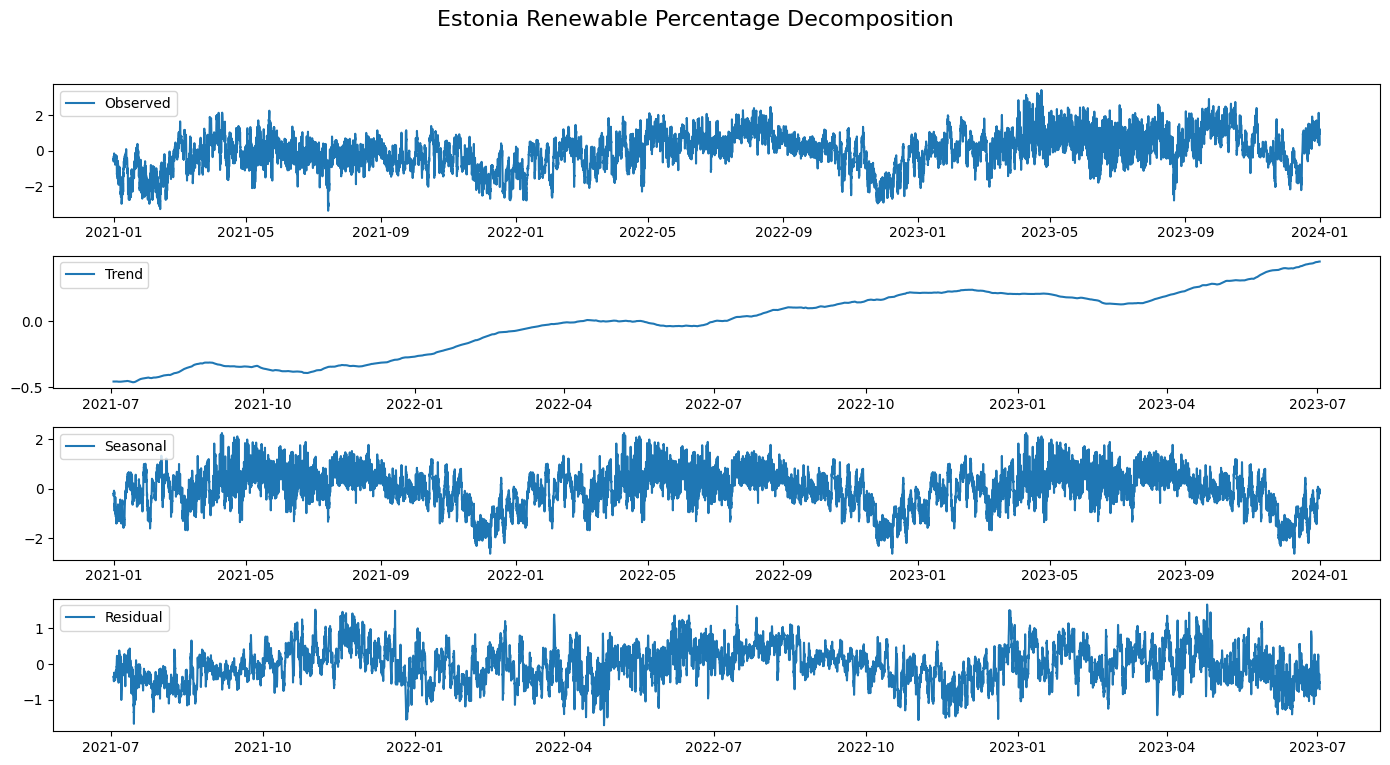

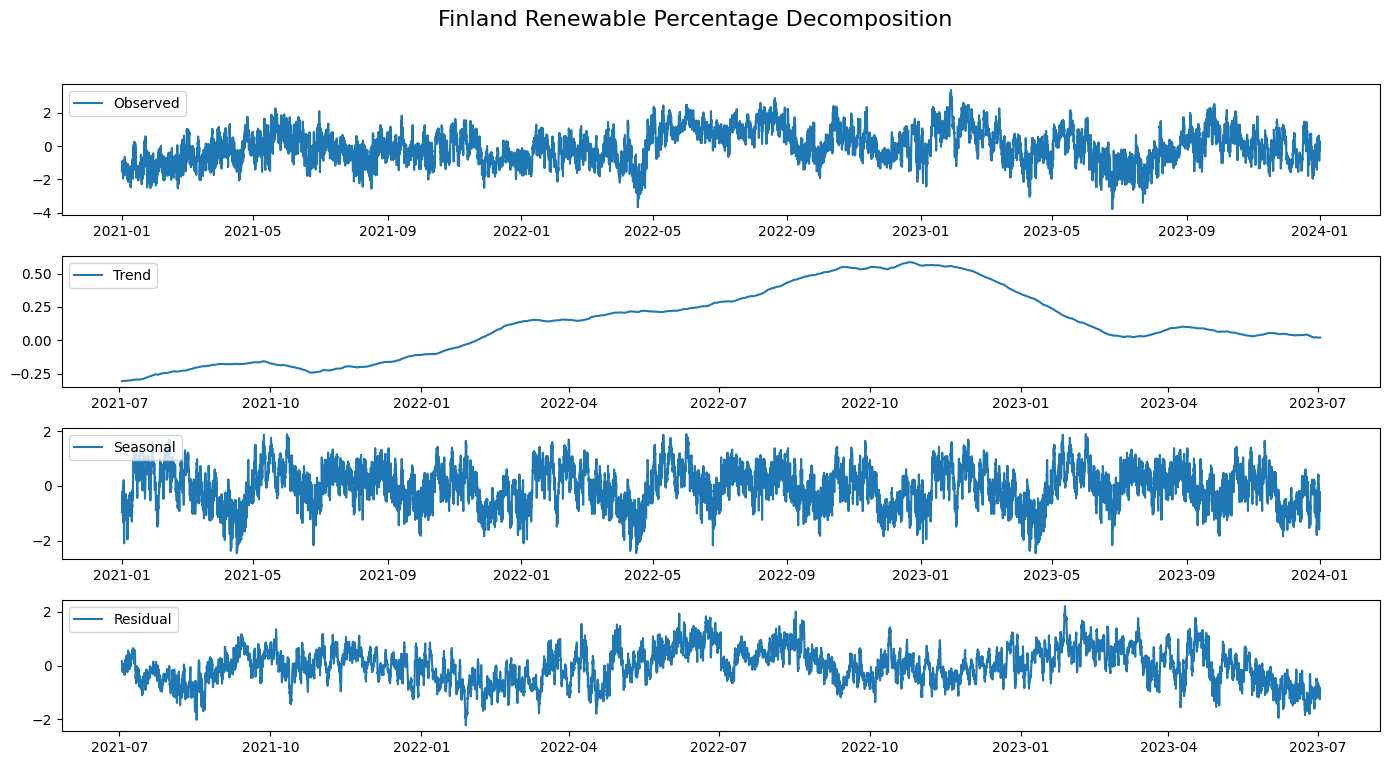

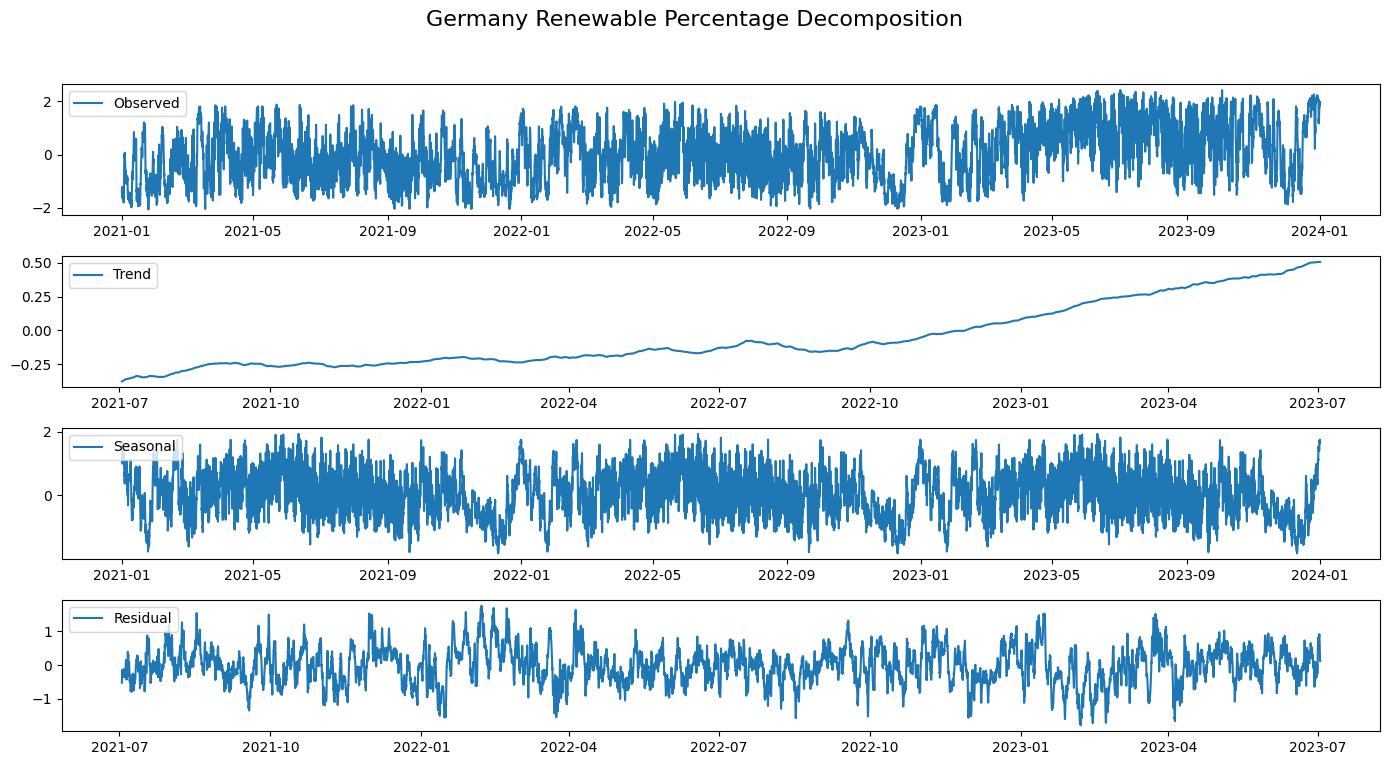

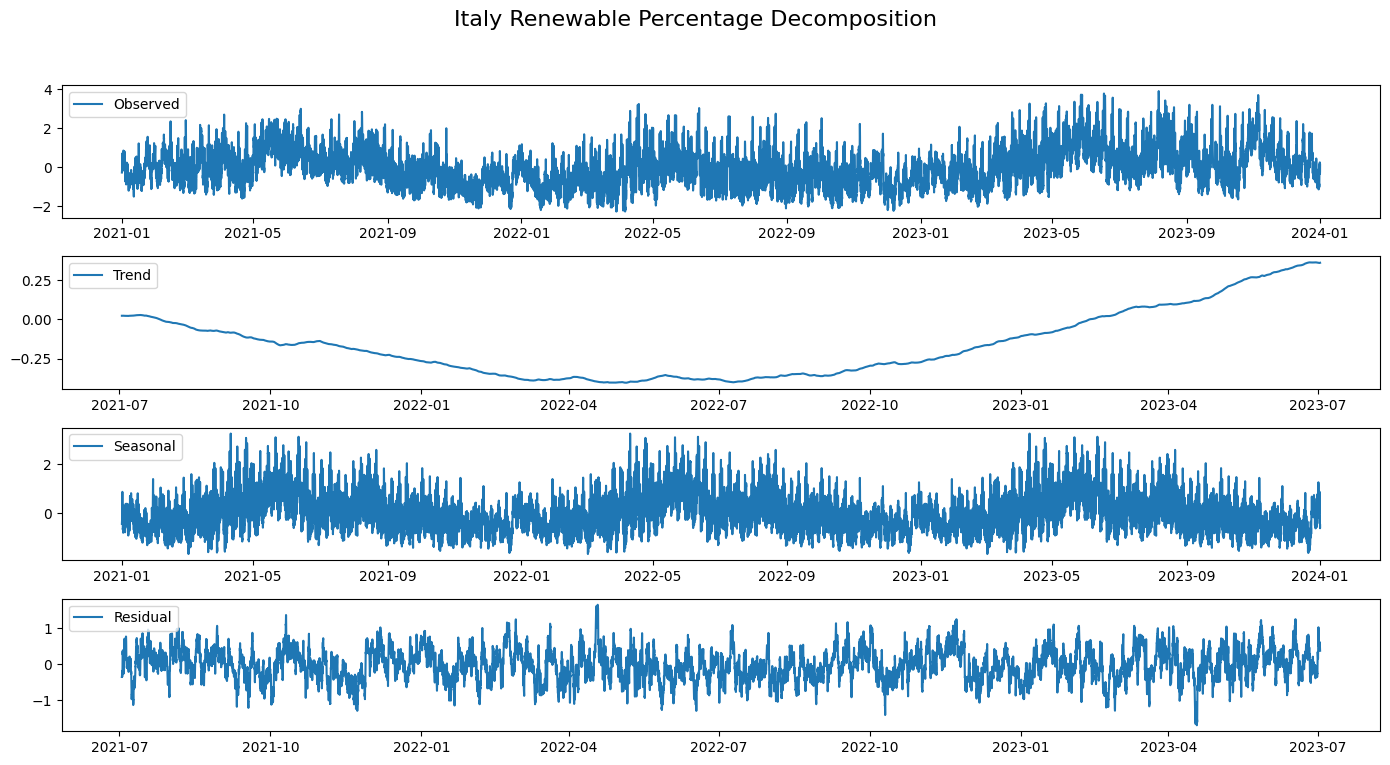

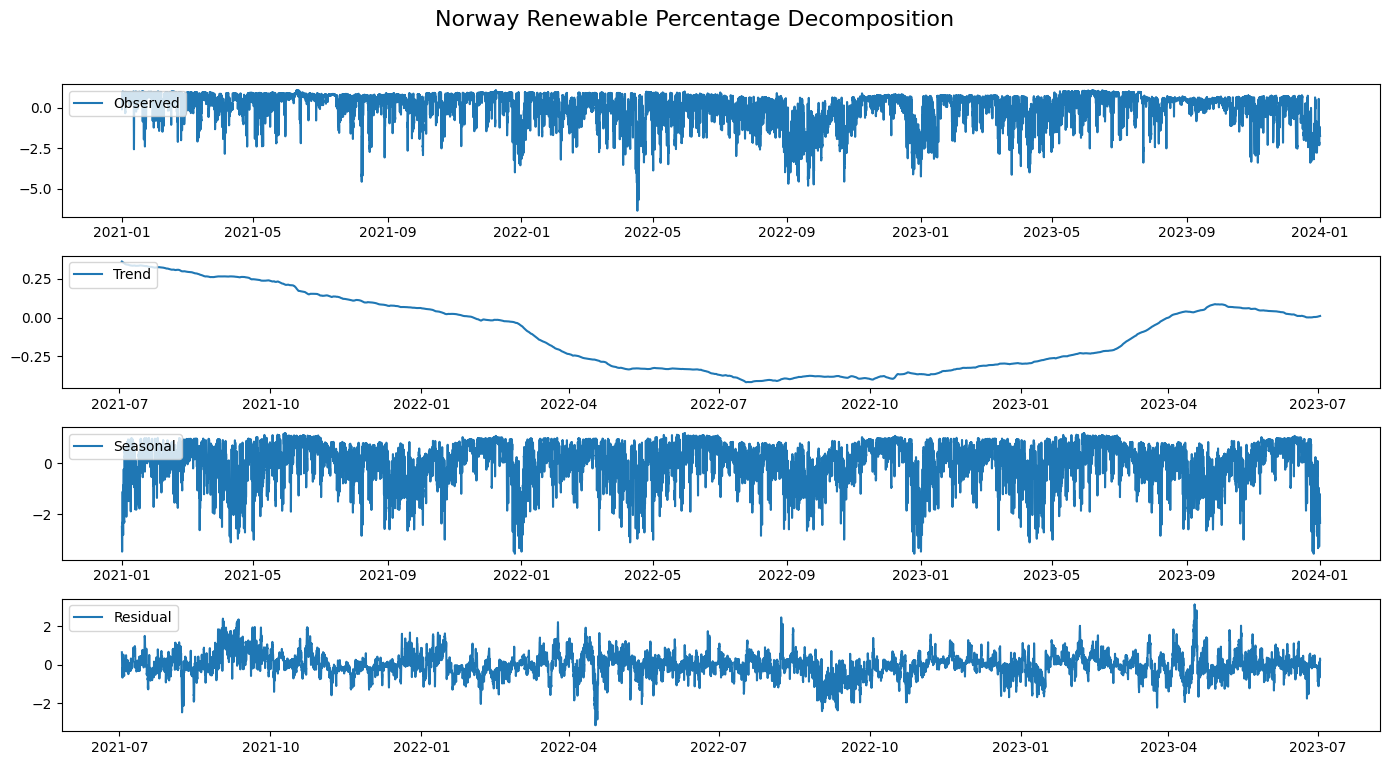

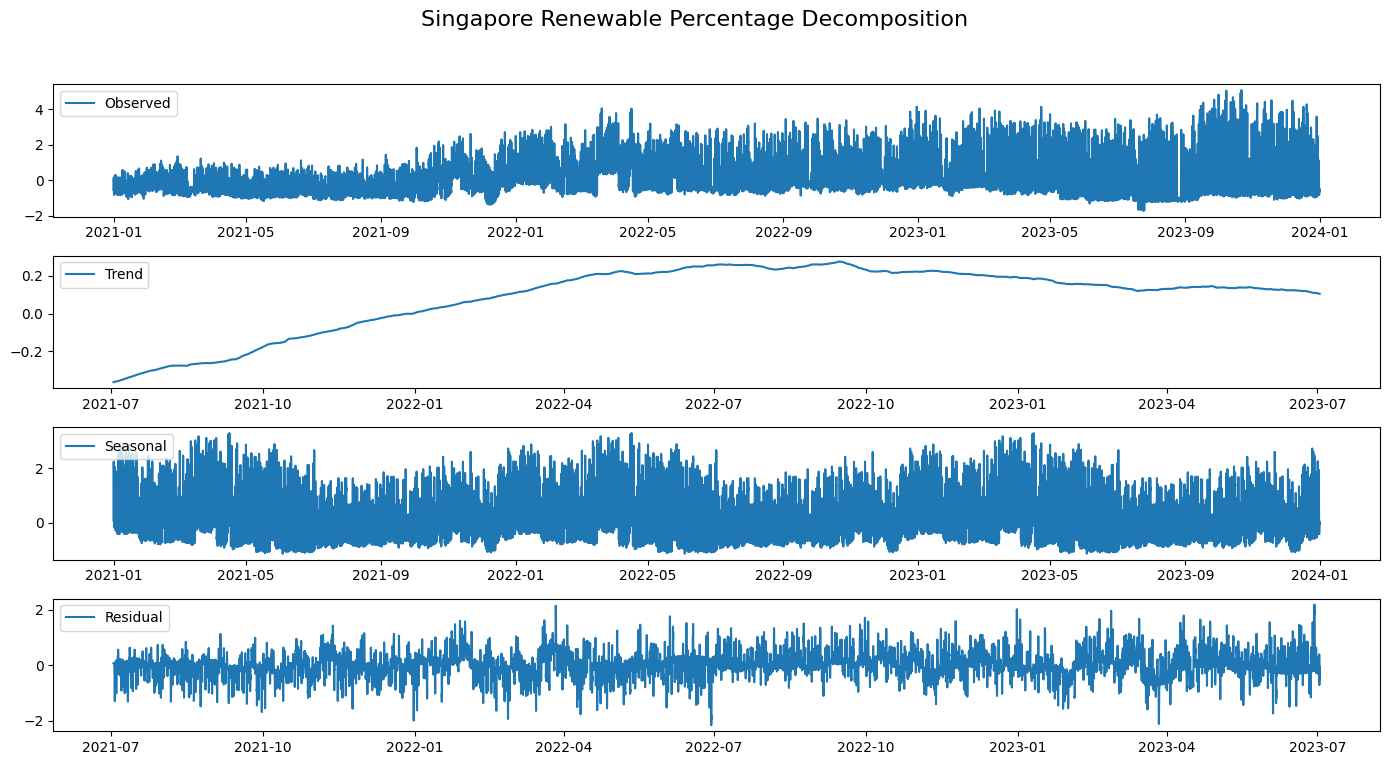

In [12]:
# Function to load data
def load_data(file_paths):
    data_frames = [pd.read_csv(file_path, parse_dates=['Datetime (UTC)'], index_col='Datetime (UTC)') for file_path in file_paths]
    return pd.concat(data_frames, ignore_index=False)

# Load data for all countries
data = {country: load_data(file_paths) for country, file_paths in countries.items()}

# Function to preprocess data
def preprocess_data(data):
    # Drop the 'Data Estimation Method' column due to high number of missing values
    data = data.drop(columns=['Data Estimation Method'])

    # Fill missing values in numeric columns with the mean of the respective columns
    numeric_columns = data.select_dtypes(include=[np.number]).columns
    data[numeric_columns] = data[numeric_columns].fillna(data[numeric_columns].mean())

    # Normalization
    for column in numeric_columns:
        data[column] = (data[column] - data[column].mean()) / data[column].std()

    return data

# Preprocess data for all countries
preprocessed_data = {country: preprocess_data(df) for country, df in data.items()}

# Function to decompose time series data
def decompose_time_series(df, column, period):
    decomposition = seasonal_decompose(df[column], model='additive', period=period)
    return decomposition

# Function to plot decomposition results
def plot_decomposition(decomposition, country):
    plt.figure(figsize=(14, 8))
    plt.suptitle(f'{country} Renewable Percentage Decomposition', fontsize=16)

    plt.subplot(411)
    plt.plot(decomposition.observed, label='Observed')
    plt.legend(loc='upper left')

    plt.subplot(412)
    plt.plot(decomposition.trend, label='Trend')
    plt.legend(loc='upper left')

    plt.subplot(413)
    plt.plot(decomposition.seasonal, label='Seasonal')
    plt.legend(loc='upper left')

    plt.subplot(414)
    plt.plot(decomposition.resid, label='Residual')
    plt.legend(loc='upper left')

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

# Decompose the time series data for each country and plot the results
for country in countries:
    decomposition = decompose_time_series(preprocessed_data[country], 'Renewable Percentage', period=24*365)
    plot_decomposition(decomposition, country)

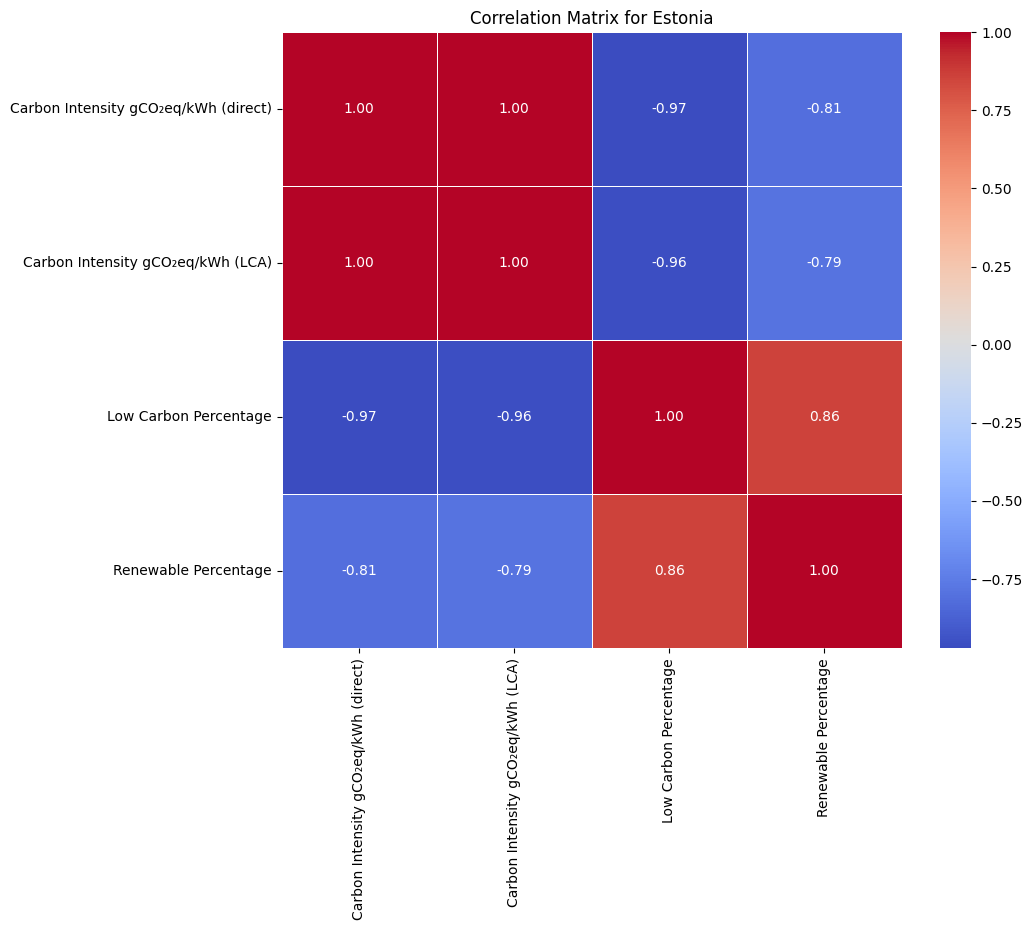

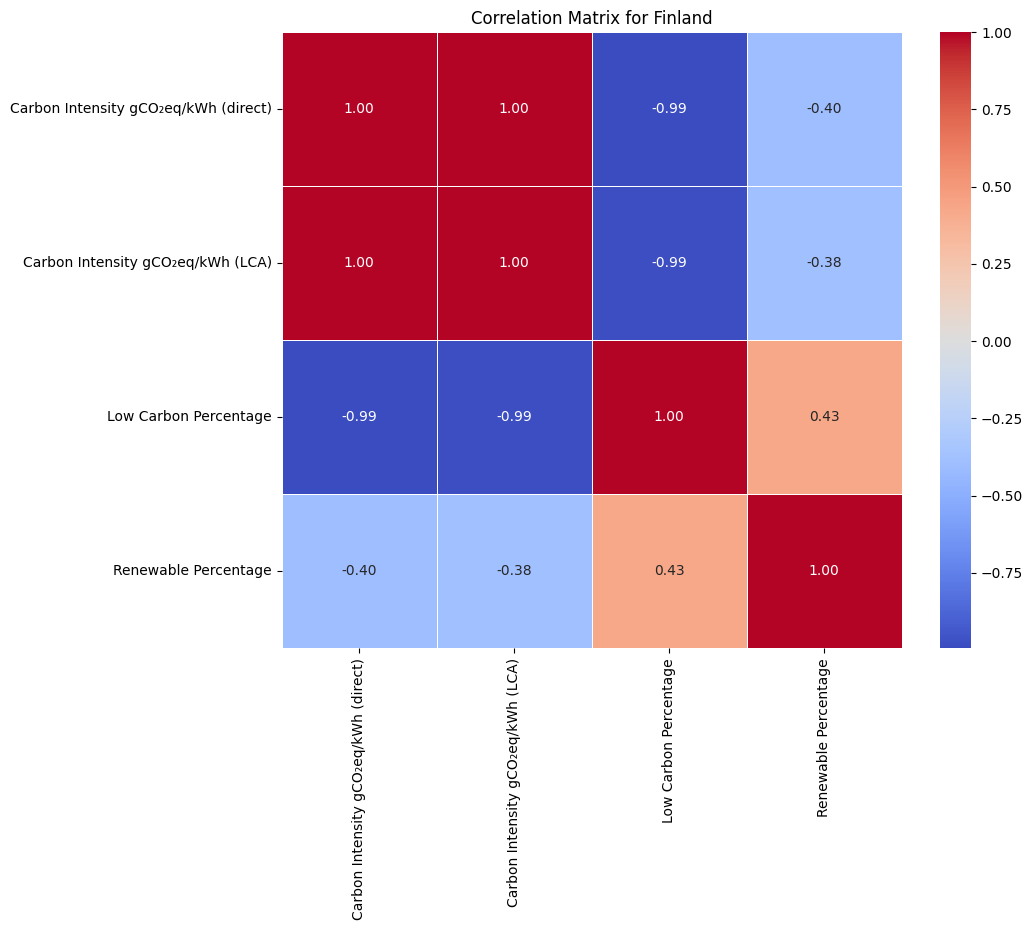

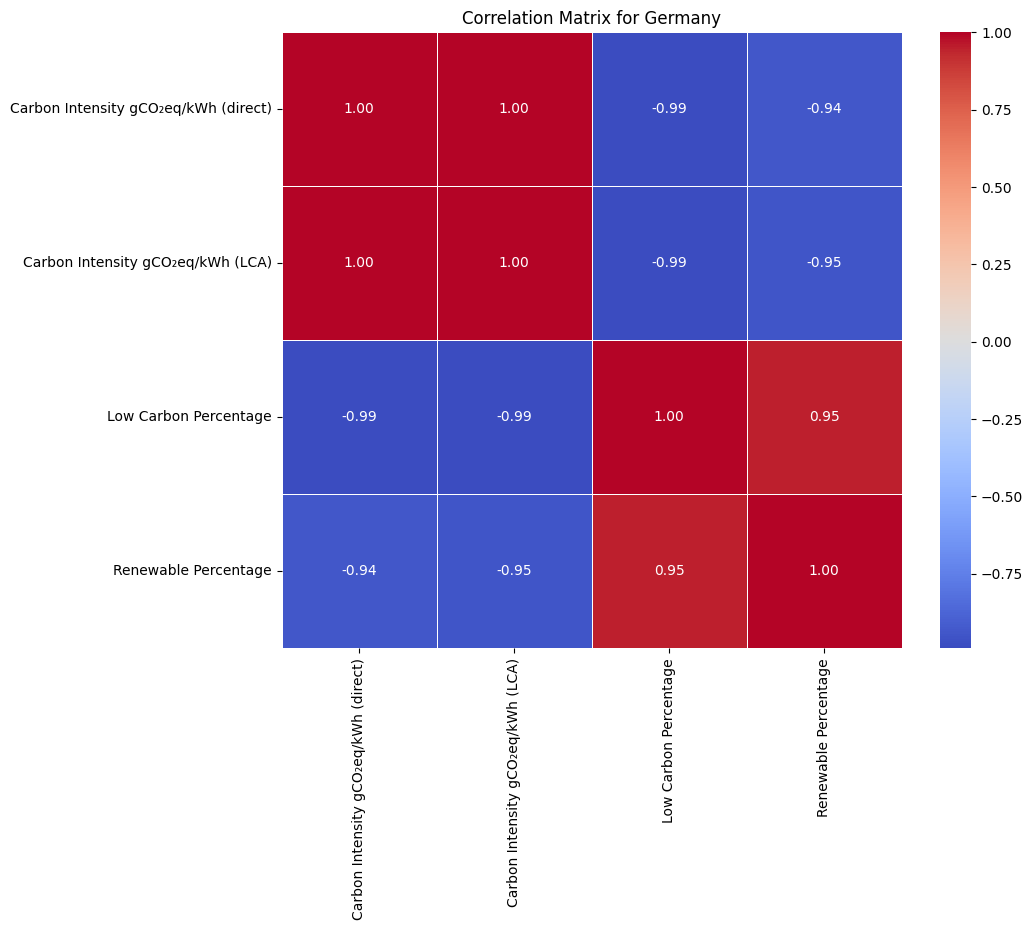

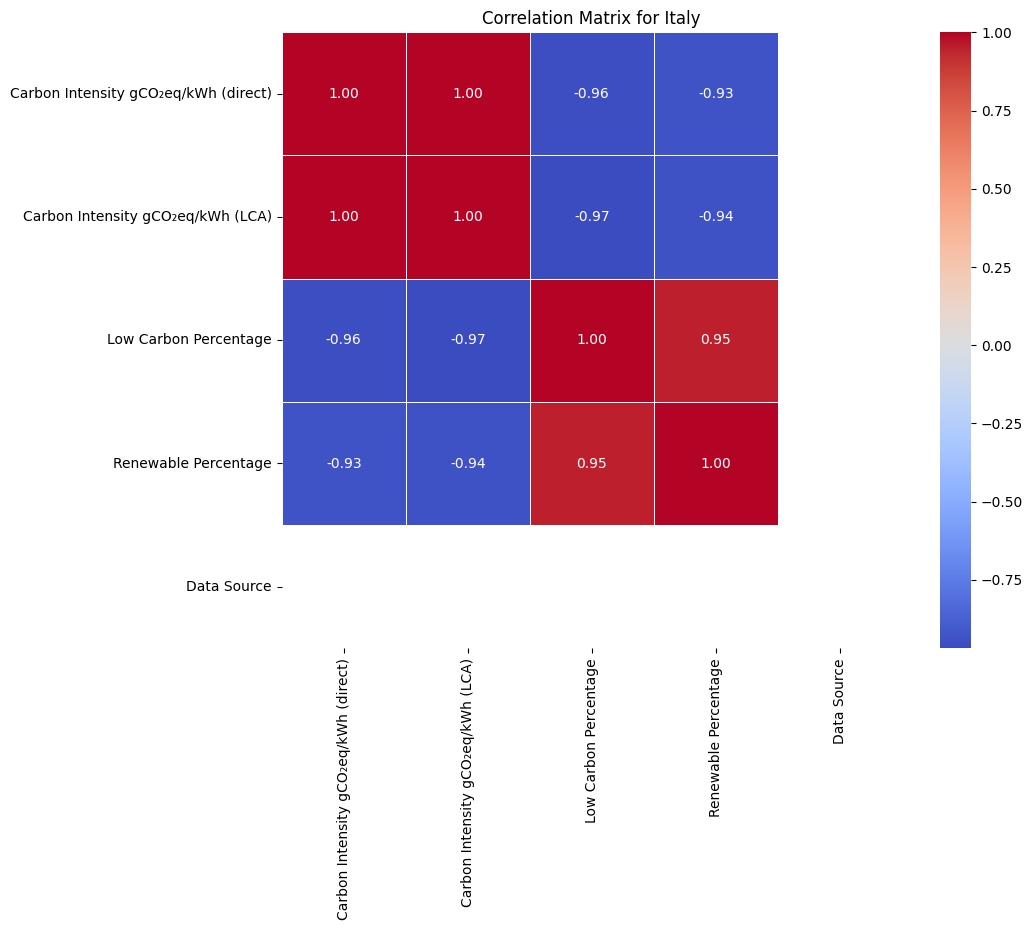

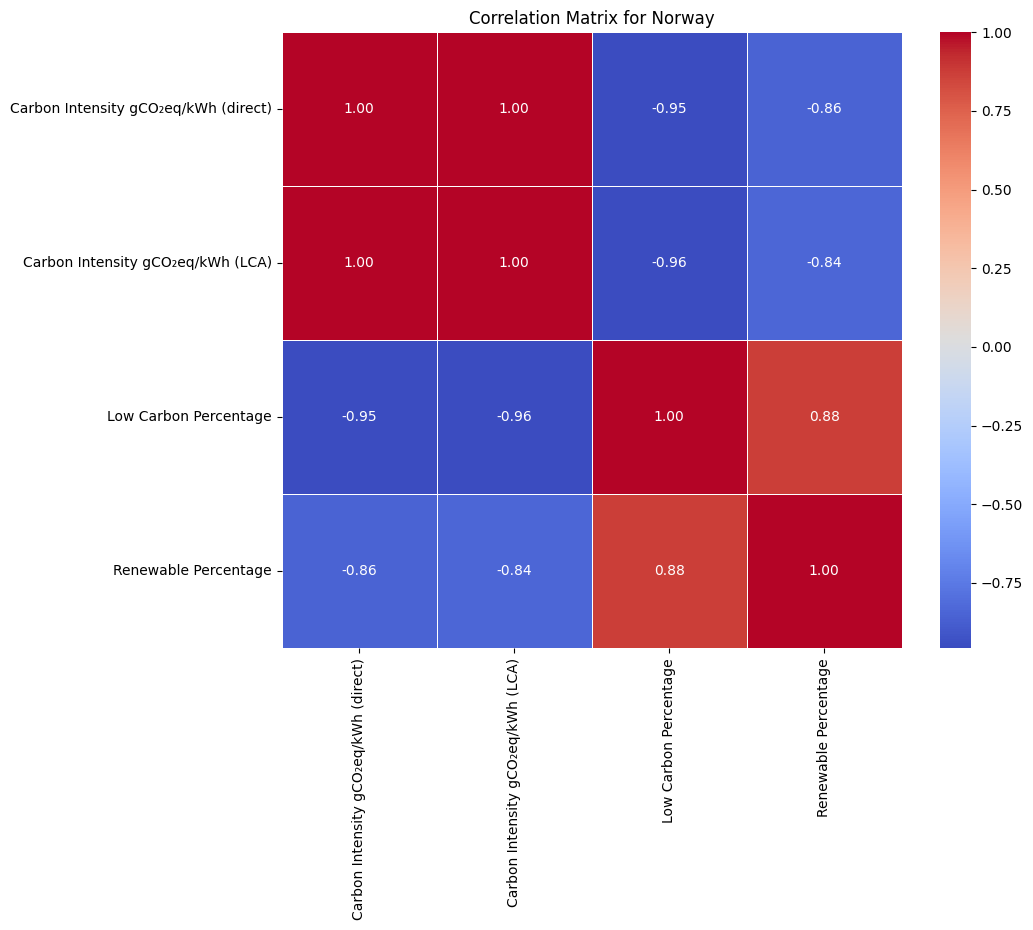

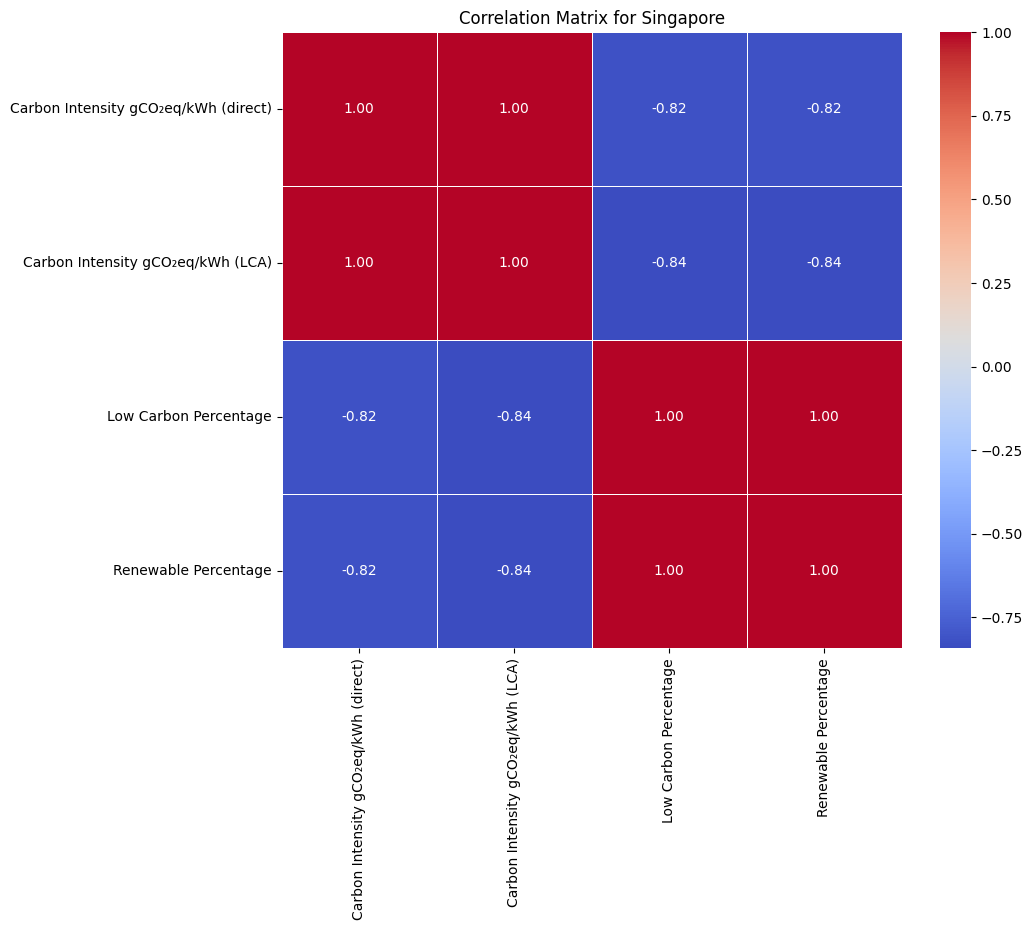

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Function to calculate and plot the correlation matrix
def plot_correlation_matrix(df, country):
    # Select only numeric columns
    numeric_df = df.select_dtypes(include=[float, int])

    # Calculate the correlation matrix
    corr_matrix = numeric_df.corr()

    # Create a heatmap to visualize the correlation matrix
    plt.figure(figsize=(10, 8))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
    plt.title(f'Correlation Matrix for {country}')
    plt.show()

# Plot correlation matrix for each country
for country, df in data.items():
    plot_correlation_matrix(df, country)


In [14]:
#Predictive Modeling for Renewable Energy Usage
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Function to preprocess data for modeling
def preprocess_for_modeling(df):
    # Drop unnecessary columns
    df = df[['Low Carbon Percentage', 'Renewable Percentage']]
    # Drop rows with missing values
    df = df.dropna()
    return df

# Preprocess data for all countries
model_data = {country: preprocess_for_modeling(df) for country, df in data.items()}


In [15]:
# Function to split data into training and test sets
def split_data(df):
    X = df[['Low Carbon Percentage']]
    y = df['Renewable Percentage']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    return X_train, X_test, y_train, y_test

# Split data for each country
split_data = {country: split_data(df) for country, df in model_data.items()}


In [16]:
# Function to train linear regression model
def train_model(X_train, y_train):
    model = LinearRegression()
    model.fit(X_train, y_train)
    return model

# Train model for each country
models = {country: train_model(split[0], split[2]) for country, split in split_data.items()}


In [17]:
# Function to evaluate model performance
def evaluate_model(model, X_test, y_test):
    predictions = model.predict(X_test)
    mse = mean_squared_error(y_test, predictions)
    return mse, predictions

# Evaluate model for each country
evaluation_results = {country: evaluate_model(model, split_data[country][1], split_data[country][3]) for country, model in models.items()}


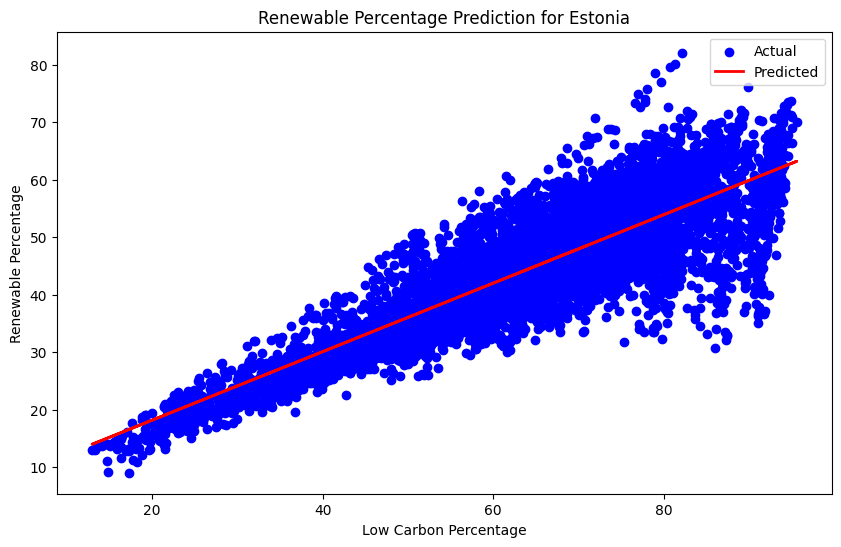

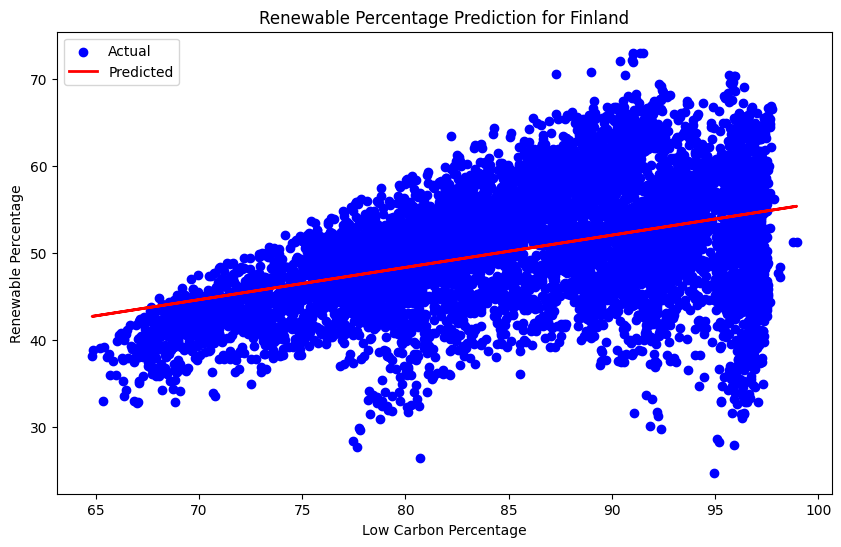

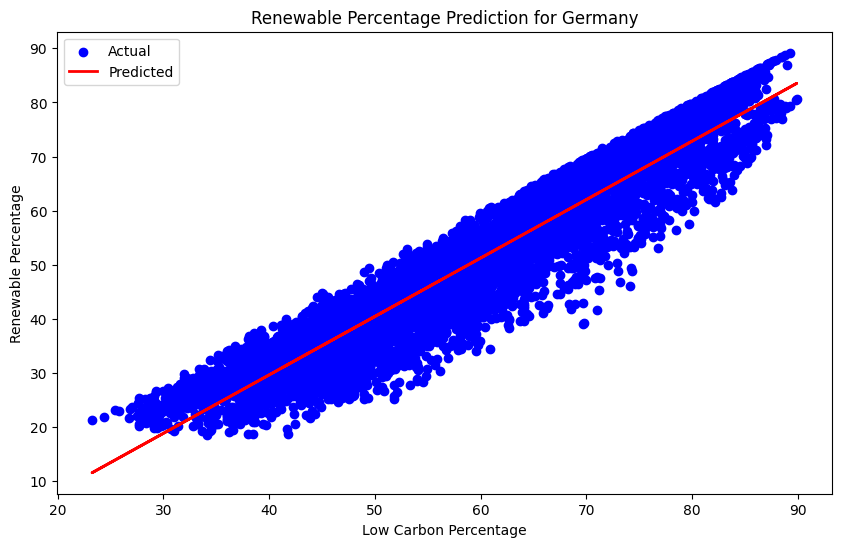

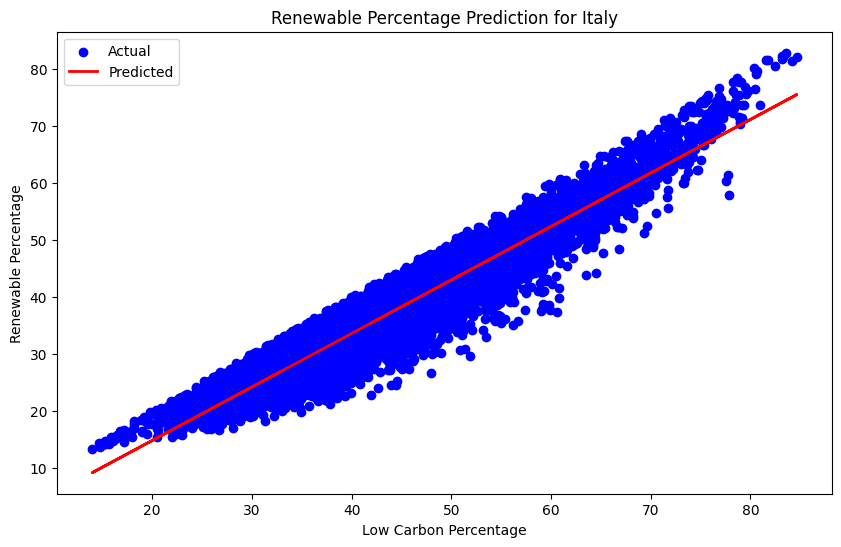

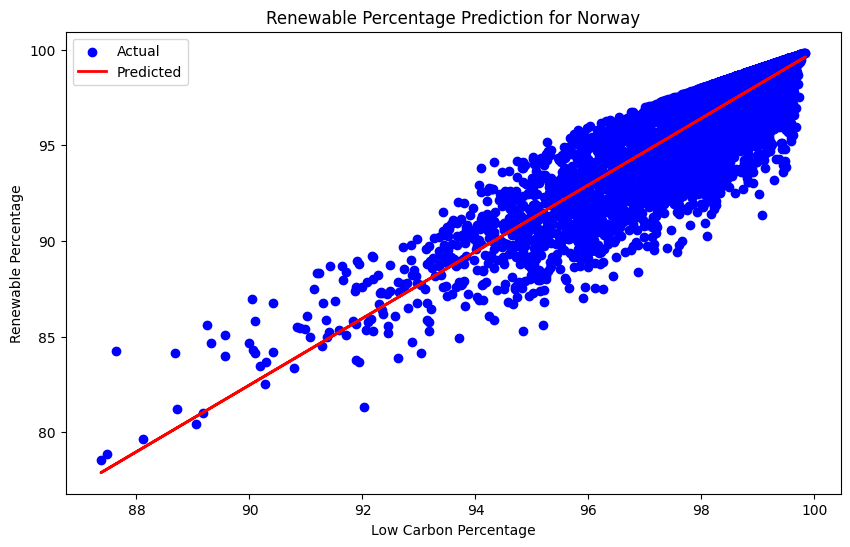

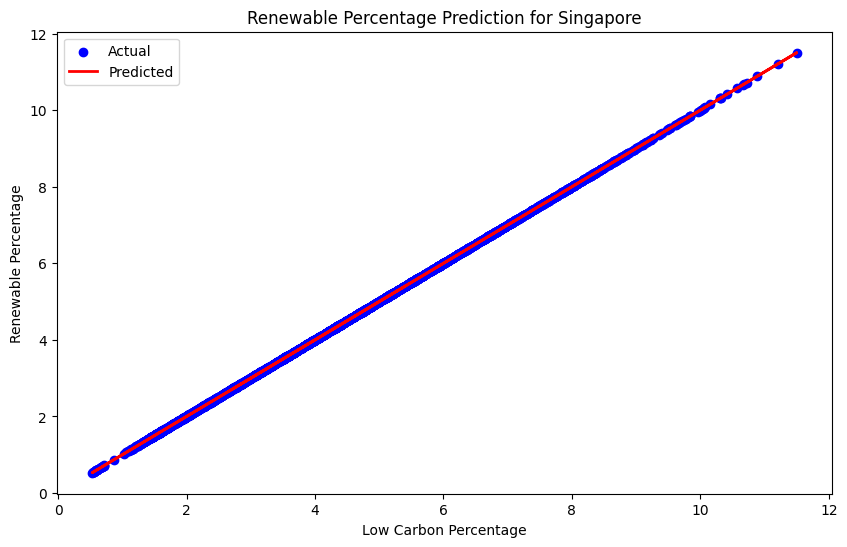

In [18]:
# Function to visualize model predictions vs. actual values
def plot_predictions(country, X_test, y_test, predictions):
    plt.figure(figsize=(10, 6))
    plt.scatter(X_test, y_test, color='blue', label='Actual')
    plt.plot(X_test, predictions, color='red', linewidth=2, label='Predicted')
    plt.title(f'Renewable Percentage Prediction for {country}')
    plt.xlabel('Low Carbon Percentage')
    plt.ylabel('Renewable Percentage')
    plt.legend()
    plt.show()

# Plot results for each country
for country, (mse, predictions) in evaluation_results.items():
    X_test = split_data[country][1]
    y_test = split_data[country][3]
    plot_predictions(country, X_test, y_test, predictions)


In [19]:
# Inspect the first few rows of each country's data to confirm column names
for country, df in data.items():
    print(f"Columns in {country} data:")
    print(df.columns)
    print(df.head())
    print("\n")


Columns in Estonia data:
Index(['Country', 'Zone Name', 'Zone Id',
       'Carbon Intensity gCO₂eq/kWh (direct)',
       'Carbon Intensity gCO₂eq/kWh (LCA)', 'Low Carbon Percentage',
       'Renewable Percentage', 'Data Source', 'Data Estimated',
       'Data Estimation Method'],
      dtype='object')
                     Country Zone Name Zone Id  \
Datetime (UTC)                                   
2021-01-01 00:00:00  Estonia   Estonia      EE   
2021-01-01 01:00:00  Estonia   Estonia      EE   
2021-01-01 02:00:00  Estonia   Estonia      EE   
2021-01-01 03:00:00  Estonia   Estonia      EE   
2021-01-01 04:00:00  Estonia   Estonia      EE   

                     Carbon Intensity gCO₂eq/kWh (direct)  \
Datetime (UTC)                                              
2021-01-01 00:00:00                               245.880   
2021-01-01 01:00:00                               252.830   
2021-01-01 02:00:00                               257.130   
2021-01-01 03:00:00                      

In [20]:
# Function to preprocess data
def preprocess_data(data):
    # Drop the 'Data Estimation Method' column due to high number of missing values
    data = data.drop(columns=['Data Estimation Method'], errors='ignore')

    # Fill missing values in numeric columns with the mean of the respective columns
    numeric_cols = data.select_dtypes(include='number').columns
    data[numeric_cols] = data[numeric_cols].fillna(data[numeric_cols].mean())

    return data

# Assuming `data` is a dictionary containing the data for each country
preprocessed_data = {country: preprocess_data(df) for country, df in data.items()}

# Function to check percentages
def check_percentages(data):
    # Add a new column that checks if Low Carbon Percentage + Renewable Percentage == 100
    data['Sum Check'] = data['Low Carbon Percentage'] + data['Renewable Percentage']
    # Check for any rows where the sum is not 100
    discrepancies = data[data['Sum Check'] != 100]
    return discrepancies

# Check percentages for each country
discrepancies = {country: check_percentages(df) for country, df in preprocessed_data.items()}

# Print results
for country, discrepancy in discrepancies.items():
    if discrepancy.empty:
        print(f"All rows in {country} data add up to 100%")
    else:
        print(f"Discrepancies found in {country} data:")
        print(discrepancy[['Low Carbon Percentage', 'Renewable Percentage', 'Sum Check']])


Discrepancies found in Estonia data:
                     Low Carbon Percentage  Renewable Percentage  Sum Check
Datetime (UTC)                                                             
2021-01-01 00:00:00                 62.400                38.800    101.200
2021-01-01 01:00:00                 61.590                38.140     99.730
2021-01-01 02:00:00                 60.920                37.370     98.290
2021-01-01 03:00:00                 61.130                37.800     98.930
2021-01-01 04:00:00                 61.900                38.480    100.380
...                                    ...                   ...        ...
2023-12-31 19:00:00                 68.540                56.540    125.080
2023-12-31 20:00:00                 65.860                57.700    123.560
2023-12-31 21:00:00                 61.230                56.190    117.420
2023-12-31 22:00:00                 59.830                54.630    114.460
2023-12-31 23:00:00                 60.800         

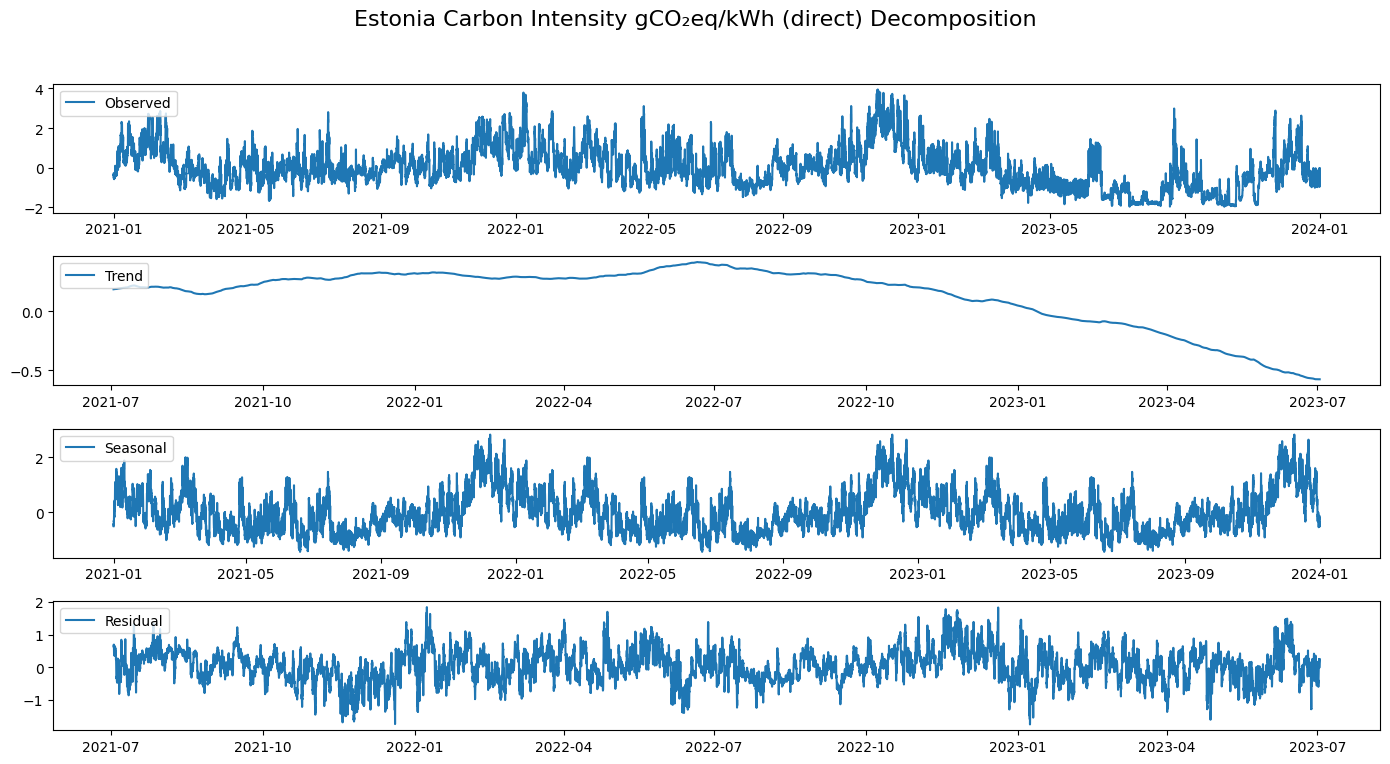

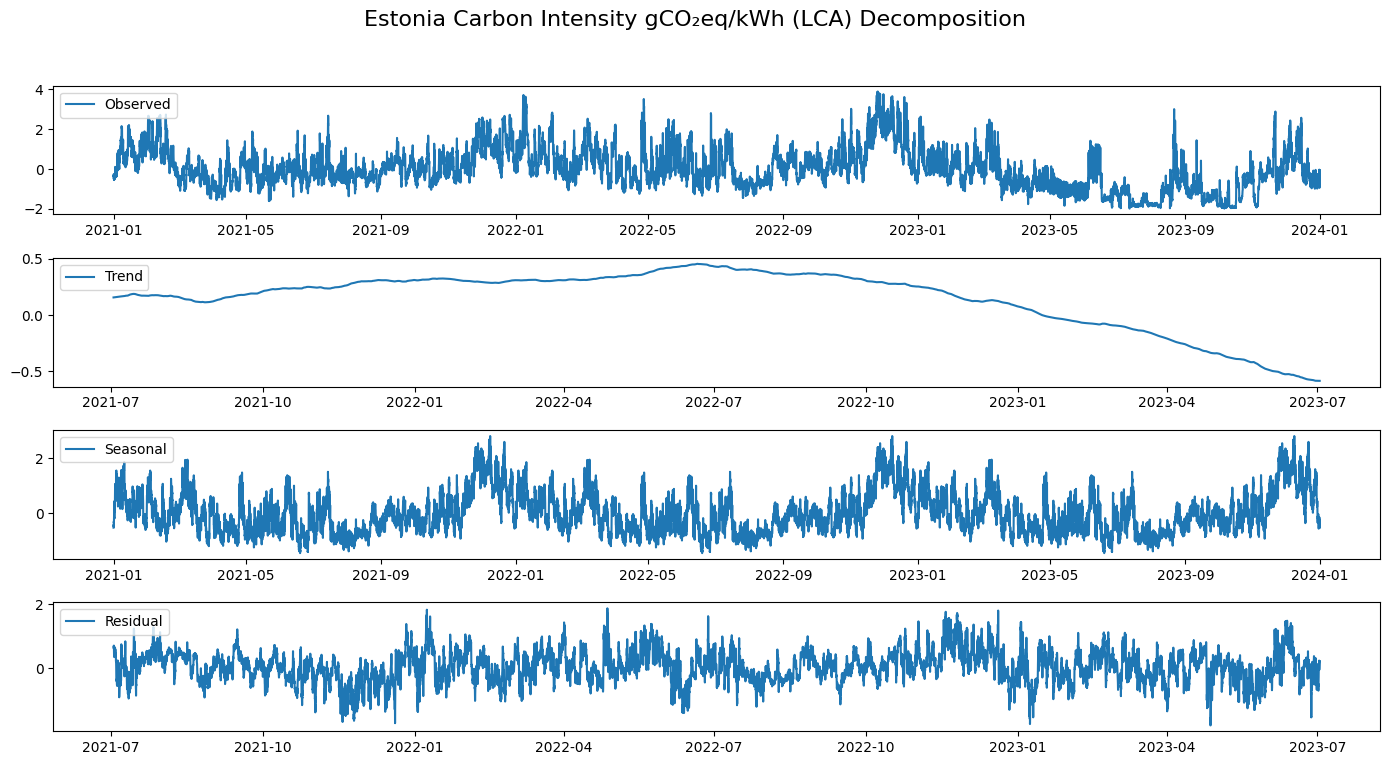

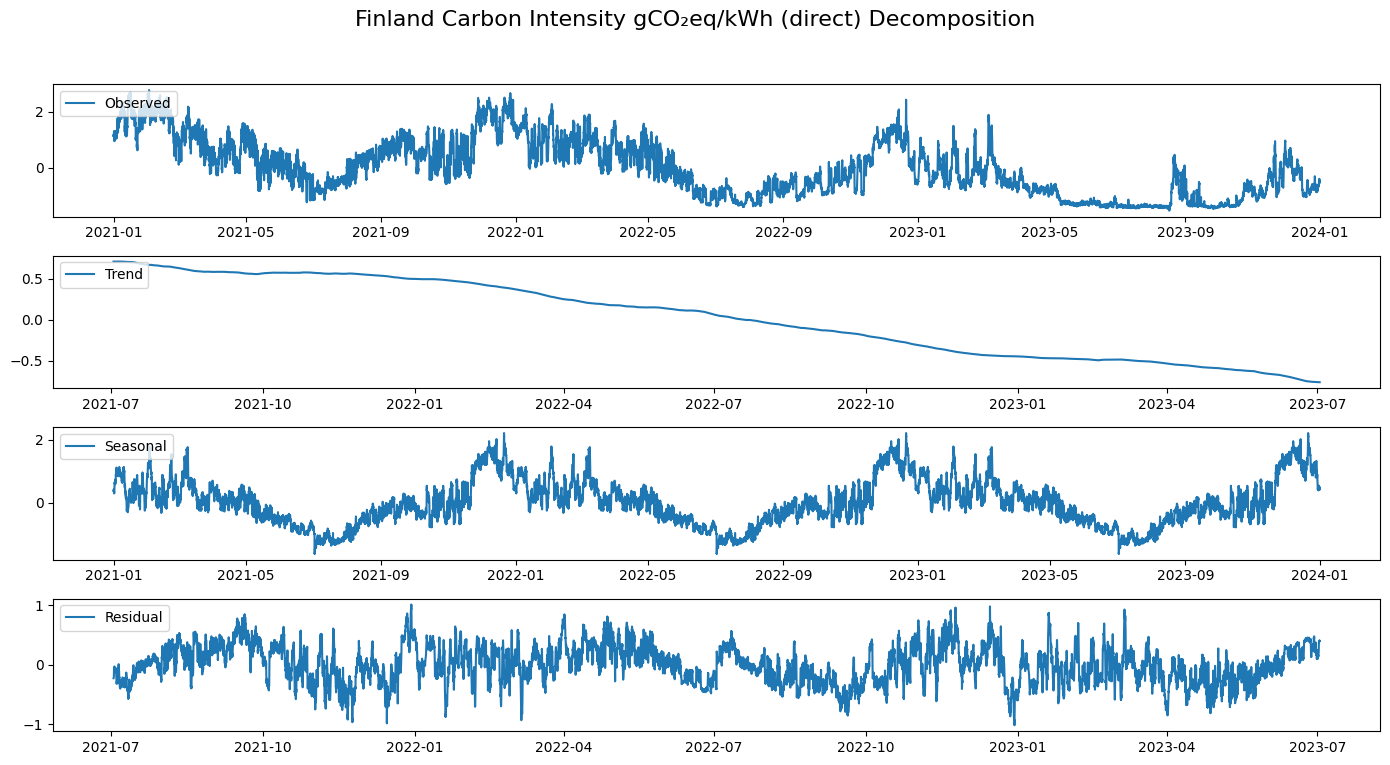

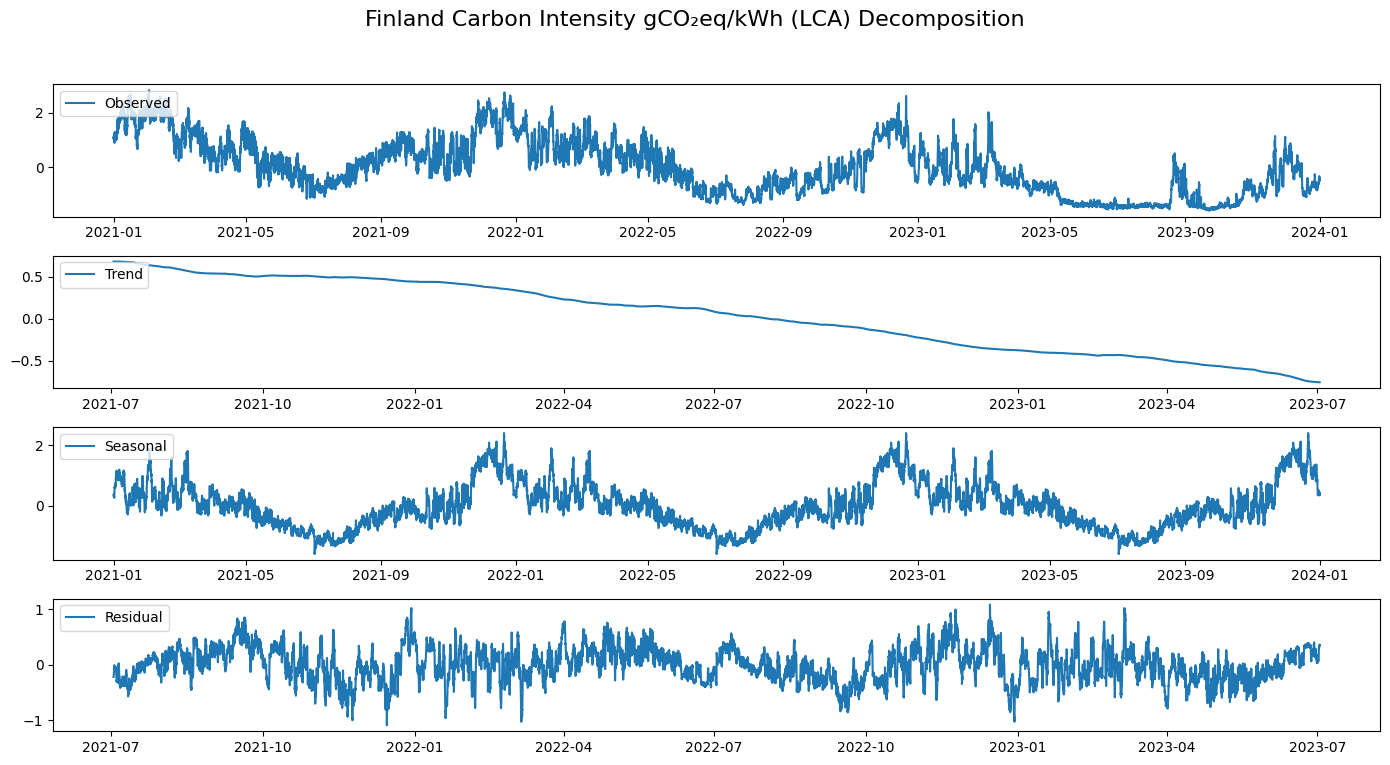

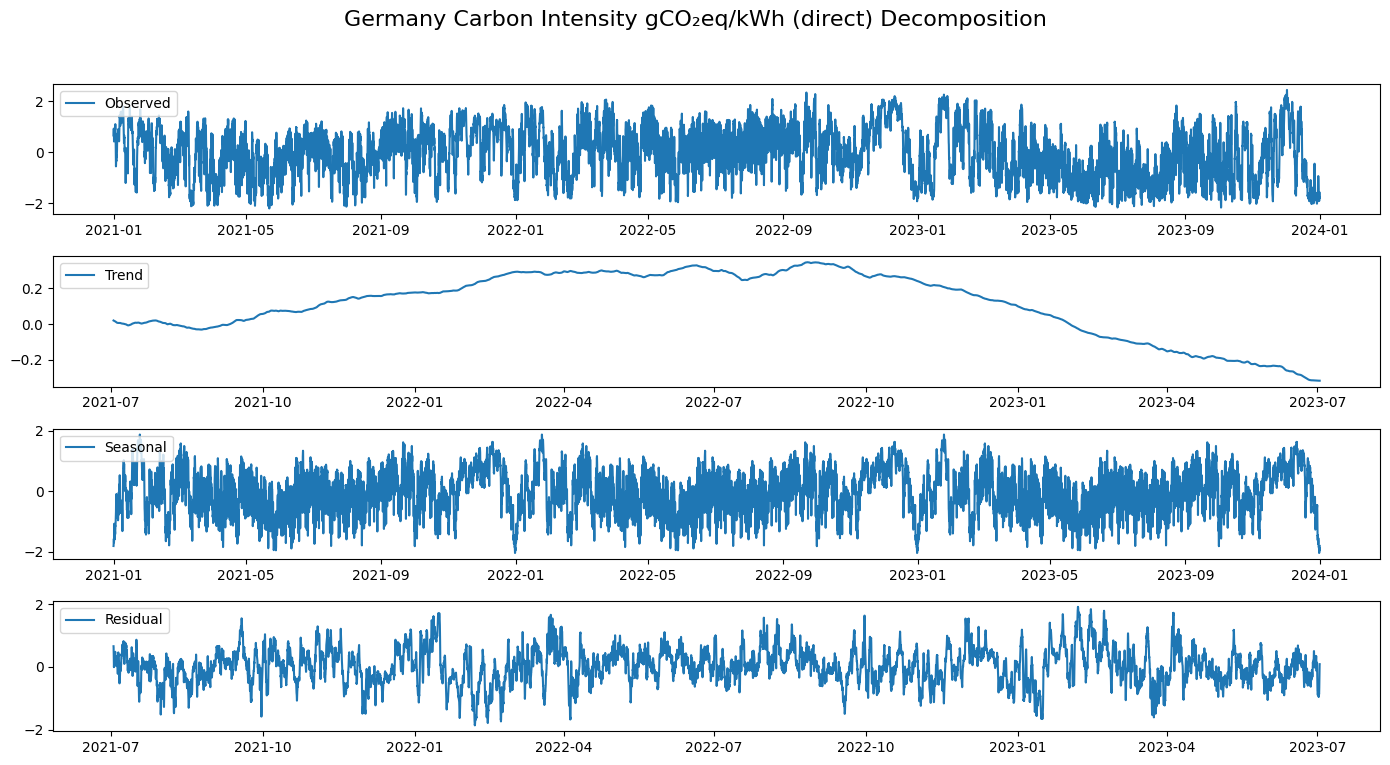

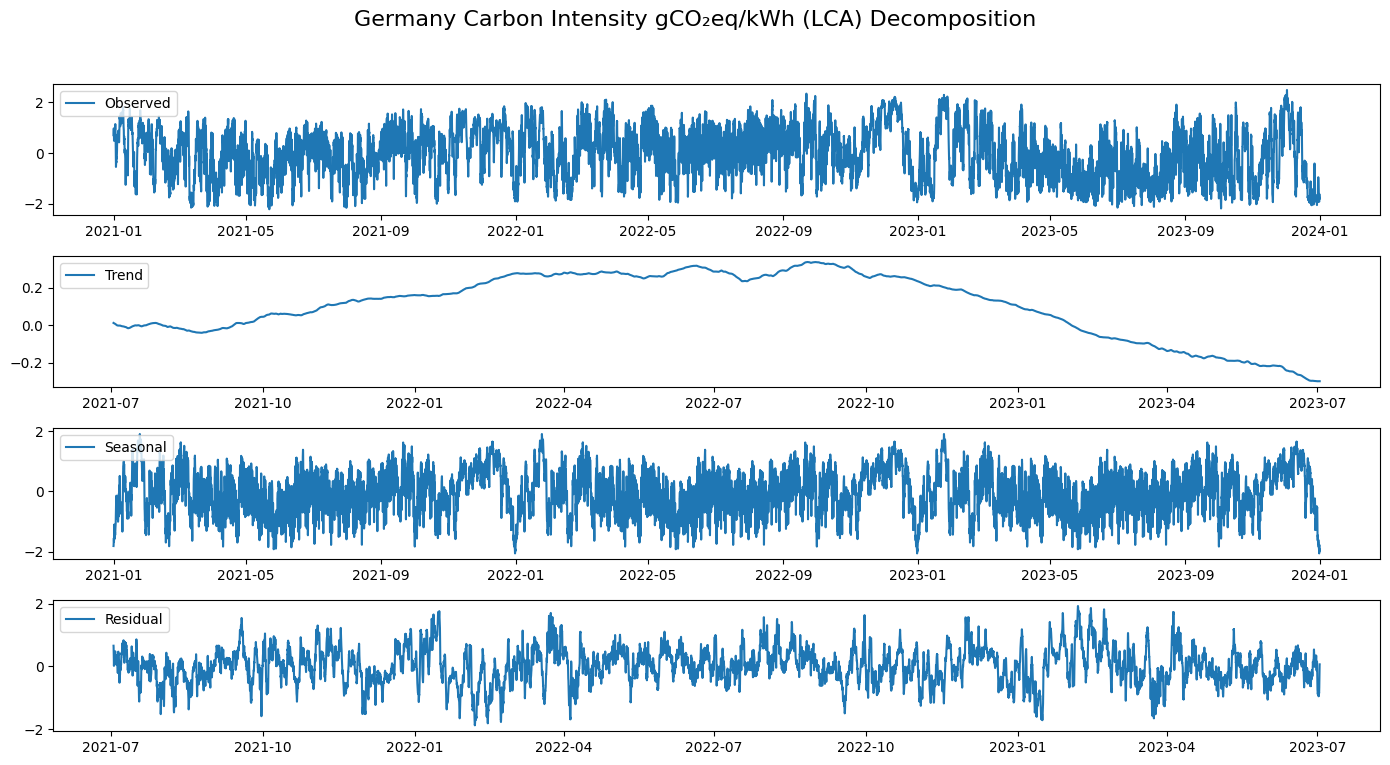

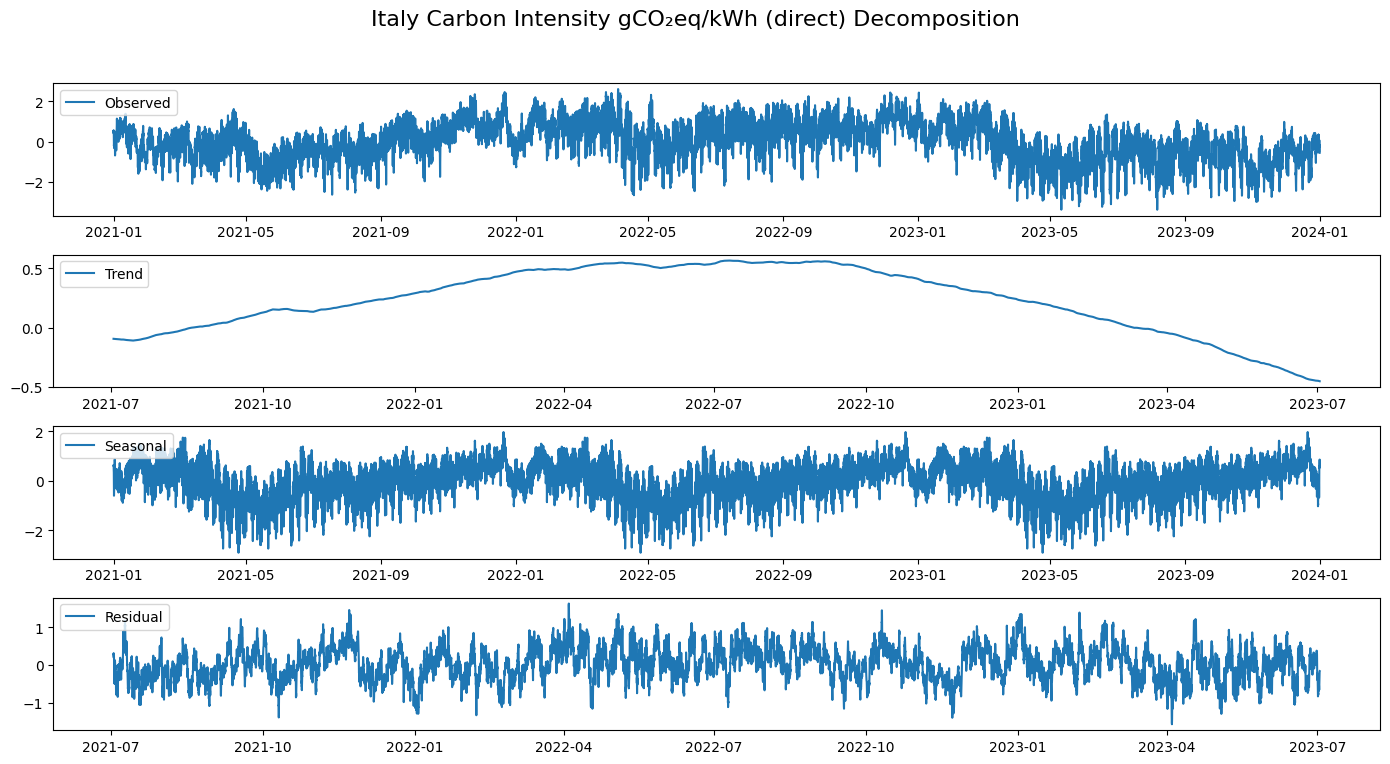

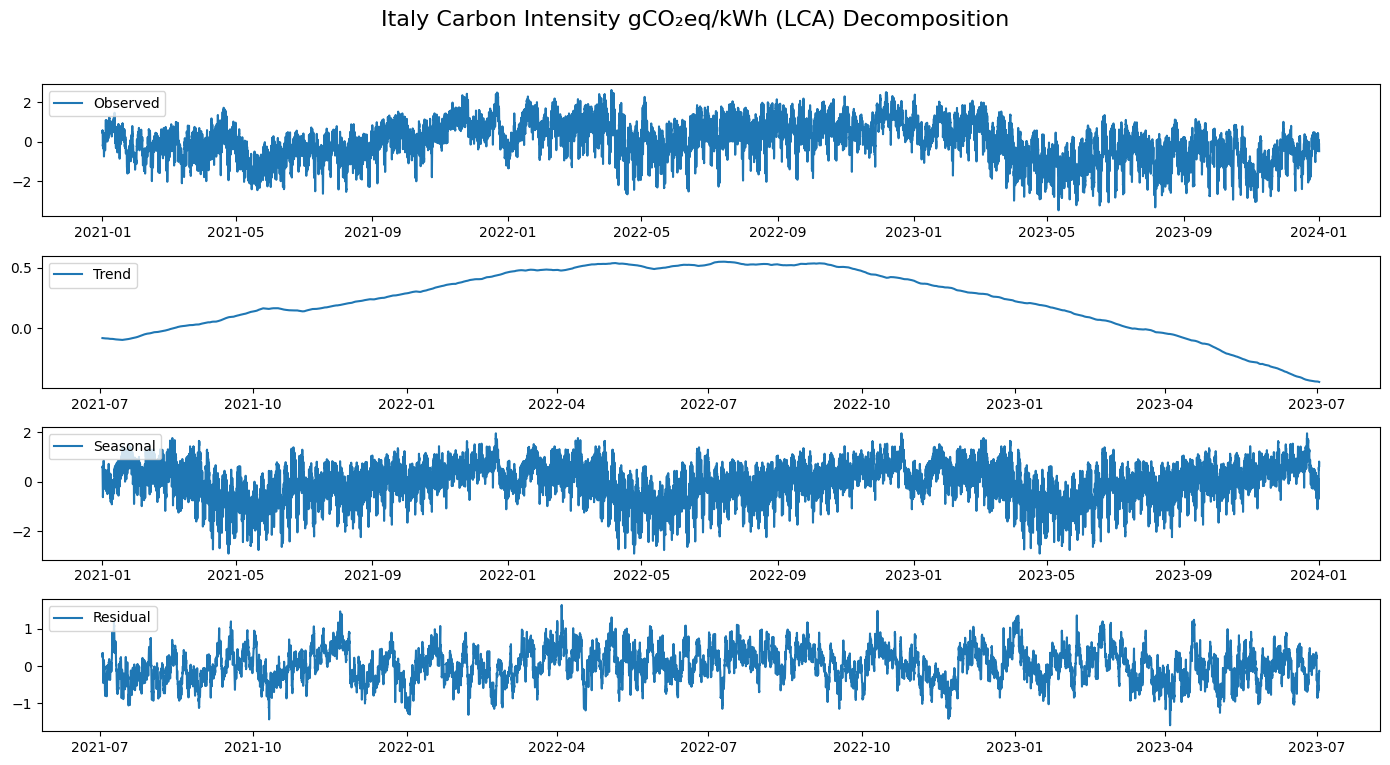

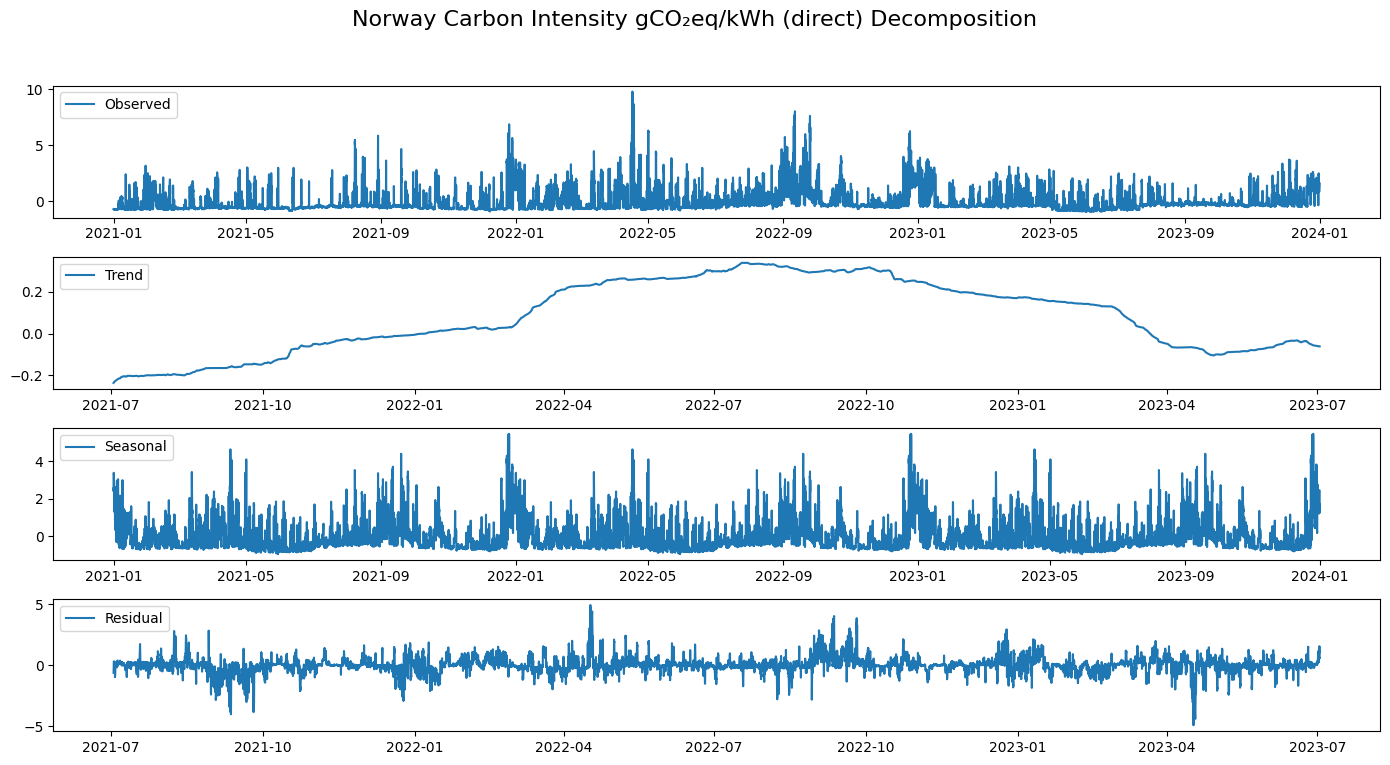

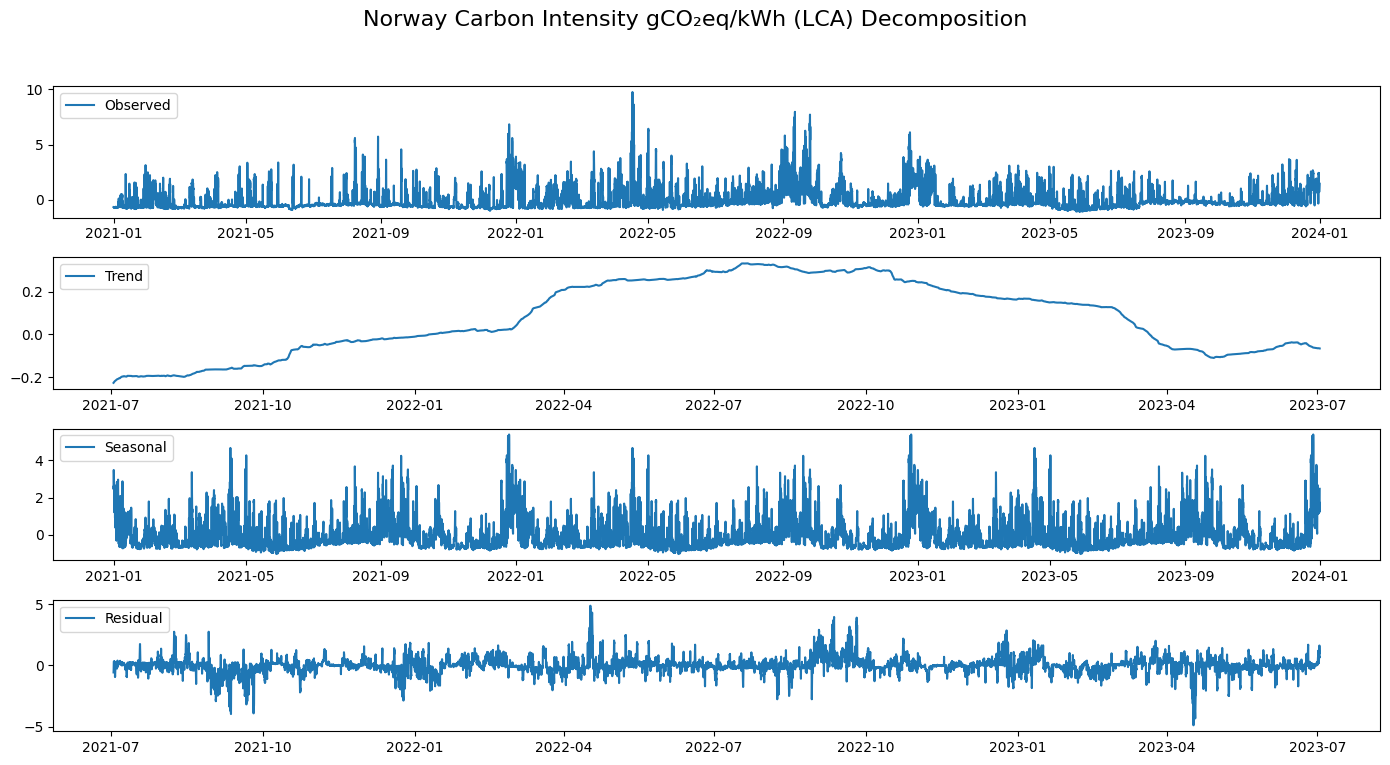

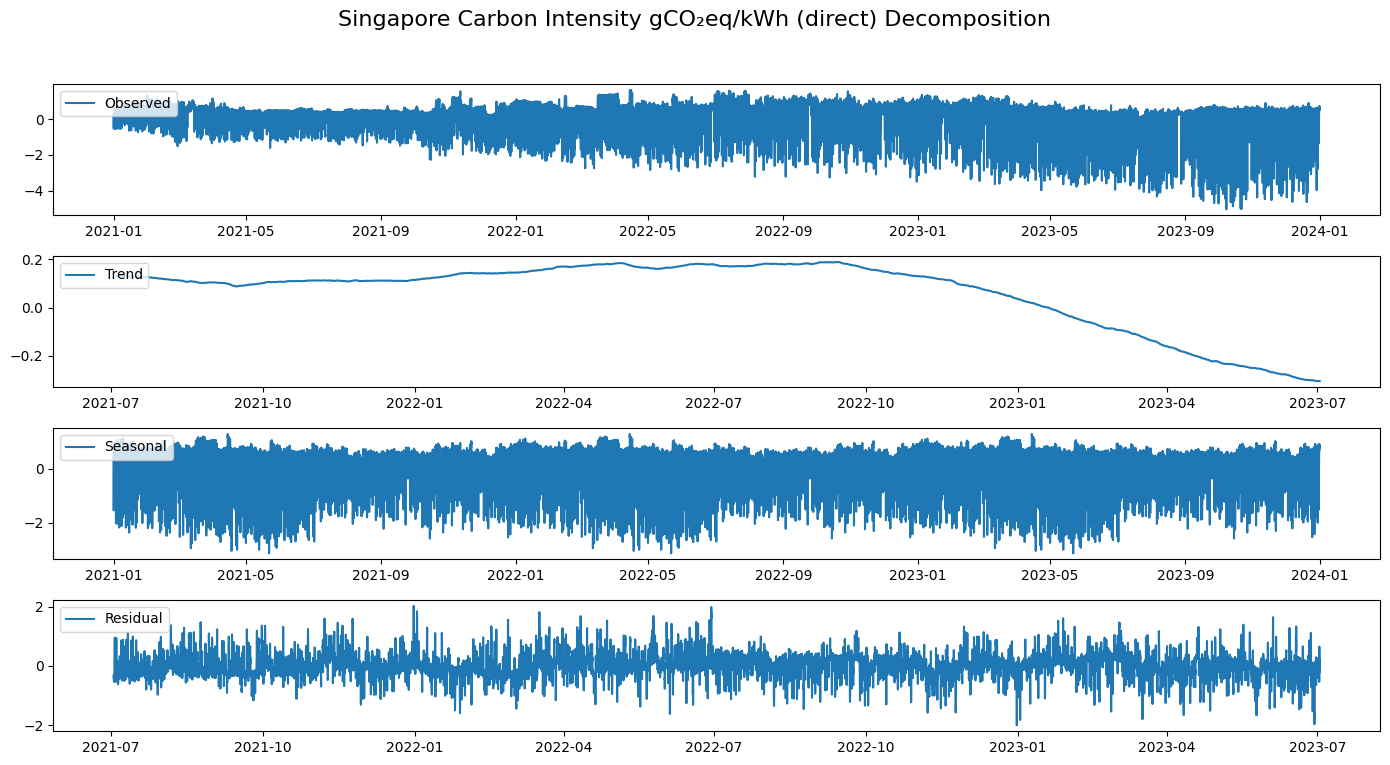

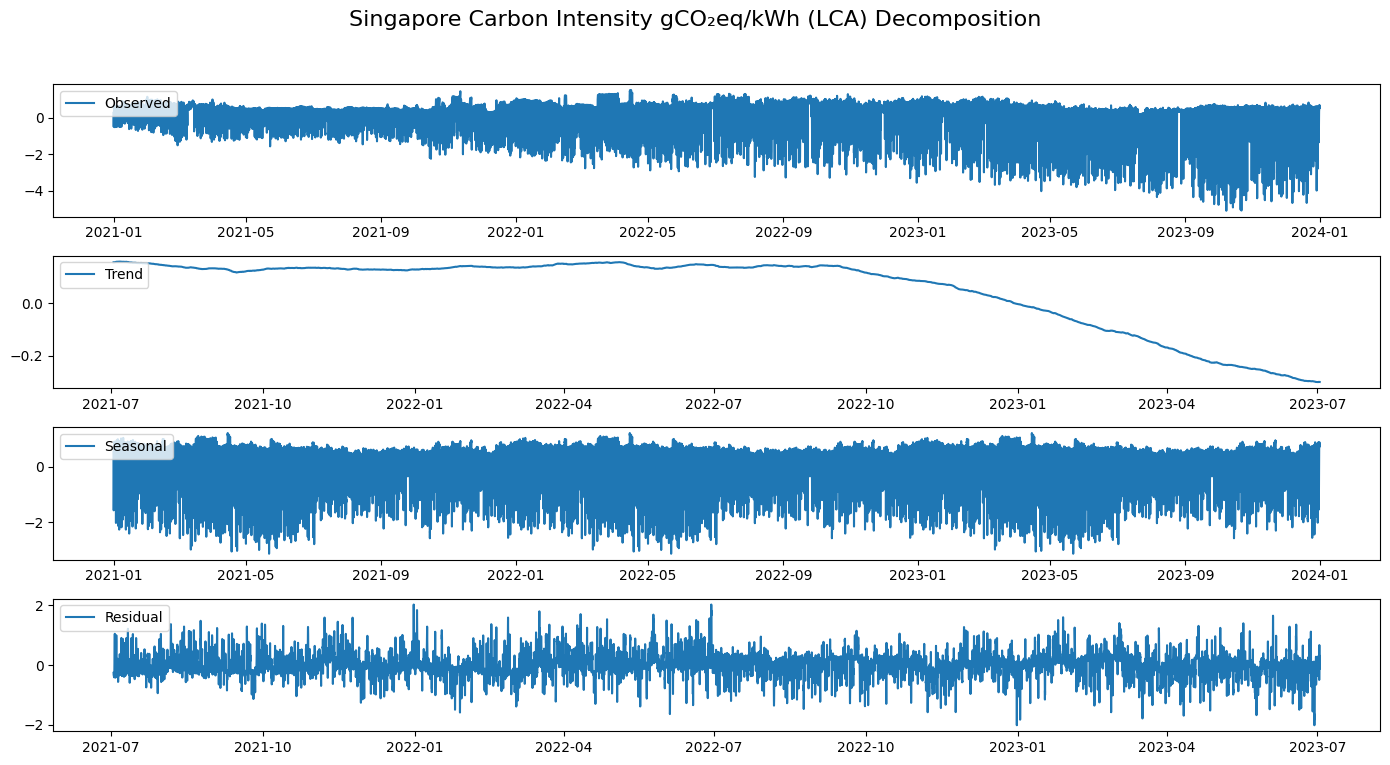

In [21]:
# Function to load data
def load_data(file_paths):
    data_frames = [pd.read_csv(file_path, parse_dates=['Datetime (UTC)'], index_col='Datetime (UTC)') for file_path in file_paths]
    return pd.concat(data_frames, ignore_index=False)

# Load data for all countries
data = {country: load_data(file_paths) for country, file_paths in countries.items()}

# Function to preprocess data
def preprocess_data(data):
    # Drop the 'Data Estimation Method' column due to high number of missing values
    data = data.drop(columns=['Data Estimation Method'])

    # Fill missing values in numeric columns with the mean of the respective columns
    numeric_columns = data.select_dtypes(include=[np.number]).columns
    data[numeric_columns] = data[numeric_columns].fillna(data[numeric_columns].mean())

    # Normalization
    for column in numeric_columns:
        data[column] = (data[column] - data[column].mean()) / data[column].std()

    return data

# Preprocess data for all countries
preprocessed_data = {country: preprocess_data(df) for country, df in data.items()}

# Function to decompose time series data
def decompose_time_series(df, column, period):
    decomposition = seasonal_decompose(df[column], model='additive', period=period)
    return decomposition

# Function to plot decomposition results
def plot_decomposition(decomposition, country, column):
    plt.figure(figsize=(14, 8))
    plt.suptitle(f'{country} {column} Decomposition', fontsize=16)

    plt.subplot(411)
    plt.plot(decomposition.observed, label='Observed')
    plt.legend(loc='upper left')

    plt.subplot(412)
    plt.plot(decomposition.trend, label='Trend')
    plt.legend(loc='upper left')

    plt.subplot(413)
    plt.plot(decomposition.seasonal, label='Seasonal')
    plt.legend(loc='upper left')

    plt.subplot(414)
    plt.plot(decomposition.resid, label='Residual')
    plt.legend(loc='upper left')

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

# Decompose the time series data for each country and each specified column, and plot the results
columns_to_decompose = ['Carbon Intensity gCO₂eq/kWh (direct)', 'Carbon Intensity gCO₂eq/kWh (LCA)']

for country in countries:
    for column in columns_to_decompose:
        decomposition = decompose_time_series(preprocessed_data[country], column, period=24*365)
        plot_decomposition(decomposition, country, column)


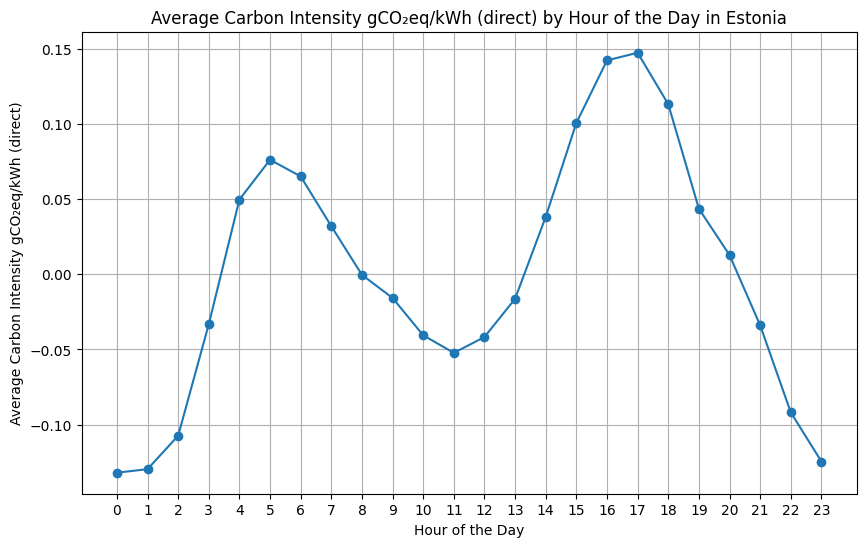

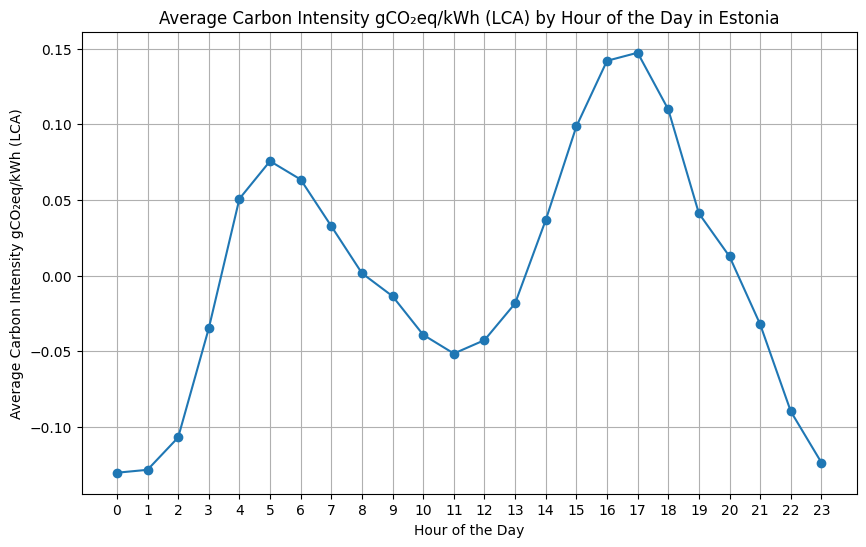

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'preprocessed_data' is a dictionary containing the preprocessed data for each country

def plot_hourly_distribution(df, country, column):
    # Extract the hour from the index
    df['Hour'] = df.index.hour

    # Group by hour and calculate the mean
    hourly_means = df.groupby('Hour')[column].mean()

    # Plot the results
    plt.figure(figsize=(10, 6))
    plt.plot(hourly_means.index, hourly_means.values, marker='o', linestyle='-')
    plt.title(f'Average {column} by Hour of the Day in {country}')
    plt.xlabel('Hour of the Day')
    plt.ylabel(f'Average {column}')
    plt.xticks(range(24))  # Ensure X-axis has 24 hours
    plt.grid(True)
    plt.show()

# for Estonia carbon intensity (direct)
plot_hourly_distribution(preprocessed_data['Estonia'], 'Estonia', 'Carbon Intensity gCO₂eq/kWh (direct)')

# for Estonia carbon intensity (LCA)
plot_hourly_distribution(preprocessed_data['Estonia'], 'Estonia', 'Carbon Intensity gCO₂eq/kWh (LCA)')

